# Flow Matching for Generative Modeling

**Source Paper**: ["Flow Matching for Generative Modeling" by Lipman et al. (2023)](https://arxiv.org/abs/2210.02747)

# Continuous Normalizing Flows (CNF)

Let $\R^d$ denote the data space with data points $x=(x^1,\ldots,x^d) \in \R^d$.

**Probability density path** $p:[0,1]\times \R^d \to \R_{>0}$ a time dependent probability density function such as $\int p_t(x)dx = 1$.

**Time-dependent vector field** $v:[0,1]\times \R^d \to \R^d$ a time dependent vector field.

**Flow** $\phi:[0,1]\times \R^d \to \R^d$ a time-dependent diffeomorphic map defined via the ordinary differential equation (ODE):
\begin{align}
    \frac{d}{dt}\phi_t(x) &= v_t(\phi_t(x)) \\
    \phi_0(x) &= x
\end{align}


**Continuous Normalizing Flow** : A deep parametric model of the flow $\phi_t$ by modeling the vector field $v_t(x;\theta)$, where $\theta\in \R^p$ are its learnable parameters.

**Push-forward**: $v_t$ generate a probability density path $p_t$ (reshapes $p_0$ to $p_1$) if its flow $\phi_t$ satisfies this equation :
\begin{align}
p_t = p_0(\phi_t^{-1}(x))\det \left[ \frac{\partial \phi_t^{-1}}{\partial x}(x)\right]
\end{align}

# Flow Matching

Let $x_1$ denote a random variable distributed according to some unknown data distribution $q(x_1)$ from which we only have access to data samples.

Let $p_t$ be a probability path such that $p_0=p$ is a the standard normal distribution $p(x) = \mathcal{N}(x | 0, I)$, and $p_1(x) \approx q(x)$.

**Flow Matching (FM) objective** : 
\begin{equation}
    \mathcal{L}_{\text{FM}}(\theta) = \mathbb{E}_{t \sim \mathcal{U}[0,1],x\sim p_t(x)}\| v_t(x)-u_t(x) \|^2
\end{equation}

$\theta$ : the learnable parameters of $v_t$.

## Conditional Flow Matching

First, we construct $p_t$ and $u_t$ since we do not have access to them.

Let  $p_t(x|x_1)$ be a **conditional probability path** such that $p_0(x|x_1) = p(x)$ and $p_1(x|x_1) = \mathcal{N}(x | x_1, \sigma^2I)$.

The marginal probability $p_t(x)$ is given by $p_t(x) = \int p_t(x|x_1) q(x_1) dx_1$.

To find $u_t(x)$, we derive $p_t(x)$ with respect to $t$ and apply the continuity equation ($\frac{\partial p_t(x)}{\partial t} + \nabla \cdot \left[ u_t(x) p_t(x) \right] = 0$):
\begin{align}
\frac{\partial p_t(x)}{\partial t} &= \int \frac{\partial p_t(x|x_1)}{\partial t} q(x_1) \, dx_1 \\
&= -\nabla \cdot \left[ \int u_t(x|x_1) p_t(x|x_1) q(x_1) \, dx_1 \right] \\
u_t(x) p_t(x) &= \int u_t(x|x_1) p_t(x|x_1) q(x_1) \, dx_1 \\
u_t(x) &= \int u_t(x|x_1) \frac{p_t(x|x_1) q(x_1)}{p_t(x)} \, dx_1 \\
\end{align}

\begin{align}
    \mathcal{L}_{\text{FM}}(\theta) &= \mathbb{E}_{t \sim \mathcal{U}[0,1],x\sim p_t(x)}\| v_t(x)-u_t(x) \|^2 \\
    &= \mathbb{E}_{t \sim \mathcal{U}[0,1],x\sim p_t(x)}\left[ \|v_t(x)\|^2 - 2.v_t(x).u_t(x) + \|u_t(x)\|^2 \right] \\

\end{align}


\begin{align}
    \mathbb{E}_{t \sim \mathcal{U}[0,1],x\sim p_t(x)}\left[ \|2.v_t(x).u_t(x) \right] &= 2 \int{v_t(x).u_t(x).p_t(x)dx} \\
    &= 2 \int{v_t(x). \frac{\int u_t(x|x_1) p_t(x|x_1) q(x_1)dx_1}{p_t(x)} .p_t(x)dx} \\
    &= 2 \int{\int v_t(x).u_t(x|x_1) p_t(x|x_1) q(x_1)dx_1dx} \\
    &= 2 . \mathbb{E}_{x \sim p_t(x|x_1), x_1 \sim q(x_1)}\left[ \ v_t(x).u_t(x|x_1) \right] \\
\end{align}

\begin{align}
    \mathcal{L}_{\text{FM}}(\theta) &= \mathbb{E}_{t \sim \mathcal{U}[0,1],x\sim p_t(x)}\left[ \|v_t(x)\|^2 - 2.v_t(x).u_t(x) + \|u_t(x)\|^2 \right] \\
    &= \mathbb{E}_{x\sim p_t(x|x_1), x_1 \sim q(x_1)}\left[ \|v_t(x)\|^2 - 2.v_t(x).u_t(x|x_1) + \|u_t(x|x_1)\|^2 + \|u_t(x)\|^2  - \|u_t(x|x_1)\|^2 \right] \\
    &= \mathbb{E}_{x\sim p_t(x|x_1), x_1 \sim q(x_1)}\left[ \|v_t(x) - u_t(x|x_1)\|^2 + \|u_t(x)\|^2  - \|u_t(x|x_1)\|^2 \right] \\
\end{align}

Since $u_t(x)$ does not have any impact on the weights, we can rewrite the FM objective as :
\begin{align}
    \mathcal{L}_{\text{CFM}}(\theta) &= \mathbb{E}_{x\sim p_t(x|x_1), x_1 \sim q(x_1)}\left[ \|v_t(x) - u_t(x|x_1)\|^2 \right]
\end{align}



### Optimal Transport (OT)
We consider the flow : $\psi_t(x_0) = \sigma_t(x_1)x_0 + \mu_t(x_1)$ with $u_t(x_1) = tx_1$ and $\sigma_t(x_1) = 1 - t$.

We differentiate : 
\begin{align}
    \frac{\partial}{\partial t} \psi_t(x_0) &= \frac{\partial}{\partial t} ((1-t)x_0 + tx_1) \\
    &= \frac{\partial}{\partial t} (x_0 - tx_0 + tx_1)\\
    &= x_1 - x_0\\
\end{align}


We recall : $\frac{\partial}{\partial t} \psi_t(x_0) = u(\psi_t(x_0) | x_1)$

We can now rewrite the objective as :
\begin{align}
    \mathcal{L}_{\text{CFM}}(\theta) &= \mathbb{E}_{x_0\sim p_0(x_0), x_1 \sim q(x_1)}\left[ \|v_t(\psi_t(x_0)) - \frac{\partial}{\partial t} \psi_t(x_0)  \|^2 \right] \\
    &= \mathbb{E}_{x_0\sim p_0(x_0), x_1 \sim q(x_1)}\left[ \|v_t(\psi_t(x_0)) - (x_1 - x_0) \|^2 \right]
\end{align}

We then just need to train a neural network $v_\theta(x, t)$ to approximate the target vector field.

# Implementation

We now show an implementation of the demonstrated flow matching algorithm.

## Data

In [ ]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

BATCH_SIZE = 128
NUM_WORKERS = 4

def get_checkerboard(n_samples: int = 10000) -> TensorDataset:
    """
    Generate a checkerboard dataset.
    """
    x1 = np.random.rand(n_samples) * 4 - 2
    x2_ = np.random.rand(n_samples) - np.random.randint(0, 2, n_samples) * 2
    x2 = x2_ + (np.floor(x1) % 2)
    dataset = np.stack([x1, x2 * 2], axis=1).astype("float32")
    # Normalize to be centered and scaled
    dataset = dataset / 2.0
    return TensorDataset(torch.from_numpy(dataset))

dataset = get_checkerboard()
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)

data = dataset.tensors[0].numpy()
print(f"Data shape: {data.shape}")

plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], s=1, alpha=0.5, color='green')
plt.title("Checkerboard Data Distribution")
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.grid(True, alpha=0.3)

output_file = "checkerboard_data.png"
plt.savefig(output_file)
print(f"Plot saved to {output_file}")

## Model

We use a simple MLP with time embeddings to model the vector field $v_t(x;\theta)$.

$$
\text{Emb}(t)_k = 
\begin{cases} 
\sin\left( t \cdot 10000^{-k/h} \right) & \text{si } 0 \leq k < h \\
\cos\left( t \cdot 10000^{-(k-h)/h} \right) & \text{si } h \leq k < 2h
\end{cases}
$$
with $h = \lfloor \text{dim} / 2 \rfloor$.

In [2]:
import torch
import torch.nn as nn
import numpy as np

class TimeEmbedding(nn.Module):
    """
    Sinusoidal Time embedding
    """
    def __init__(self, dim: int, max_period=10000) -> None:
        super().__init__()
        self.dim = dim
        self.half_dim = dim // 2 # Half for sin and half for cos
        self.inv_freq = torch.exp(
            torch.arange(start=0 , end=self.half_dim, dtype=torch.float32) * (-np.log(max_period) / self.half_dim)
        )

    def forward(self, t: torch.Tensor) -> torch.Tensor:
        # t: (batch_size, 1) or (batch_size,)
        if t.dim() == 1:
            t = t.unsqueeze(-1)
        
        self.inv_freq = self.inv_freq.to(t.device)
        # sin/cos embedding
        # (B, 1) * (1, half_dim) -> (B, half_dim)
        sinusoid_inp = t * self.inv_freq.unsqueeze(0)
        emb = torch.cat((sinusoid_inp.sin(), sinusoid_inp.cos()), dim=-1)
        if self.dim % 2:
            emb = torch.cat([emb, torch.zeros_like(emb[:, :1])], dim=-1)
        return emb

class MLP(nn.Module):
    """
    Simple Time-Dependent MLP.
    Concatenates input x and time embedding of t.
    """
    def __init__(self, input_dim: int, hidden_dim: int = 128, time_dim: int = 32):
        super().__init__()

        self.time_layer = TimeEmbedding(time_dim)
        self.mlp = nn.Sequential(
            nn.Linear(input_dim + time_dim, hidden_dim),
            nn.SiLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.SiLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.SiLU(),
            nn.Linear(hidden_dim, input_dim)
        )

    def forward(self, x: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        """
        x: (B, D)
        t: (B, 1) or (B,)
        """
        if t.dim() == 1:
            t = t.unsqueeze(-1)
            
        t_emb = self.time_layer(t) # (B, H)
        return self.mlp(torch.cat([x, t_emb], dim=-1))

model = MLP(input_dim=2, hidden_dim=64, time_dim=32)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

## CFM Training

We follow this objective :

\begin{align}
    \mathcal{L}_{\text{CFM}}(\theta) &= \mathbb{E}_{x_0\sim p_0(x_0), x_1 \sim q(x_1)}\left[ \|v_t(\psi_t(x_0)) - (x_1 - x_0) \|^2 \right]
\end{align}

In each training step:
1. Sample data batch $x_1 \sim q(x_1)$.
2. Sample noise batch $x_0 \sim \mathcal{N}(0, I)$.
3. Sample times $t \sim U[0, 1]$.
4. Compute interpolation: $x_t = (1-t)x_0 + t x_1$.
5. Compute target vector: $u_t = x_1 - x_0$.
6. Predict vector: $v = \text{Model}(x_t, t)$.
7. Gradient step on MSE loss.

In [15]:
from tqdm import tqdm
from torch.functional import F
EPOCHS = 1000
model.train()

device = torch.device("mps" if torch.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.train()

for epoch in range(EPOCHS):
    total_loss = 0
    dataset = tqdm(
        dataloader, desc=f"Epoch {epoch+1}/{EPOCHS}"
    )
    for batch in dataset:
        x_1 = batch[0]
        y = None

        x_1 = x_1.to(device)

        optimizer.zero_grad()
        b = x_1.shape[0]

        x_0 = torch.randn_like(x_1)  # Gaussian noise x_0
        t = torch.rand((b, 1), device=device)  # uniform t

        # Conditional flow (OT Path)
        # xt = (1-t)*x_0 + t*x_1
        # Expand t to match x dimensions for broadcasting
        t_expanded = t.view(b, *([1] * (x_1.dim() - 1)))
        x_t = (1 - t_expanded) * x_0 + t_expanded * x_1

        # Vector field u_t (derivative of x_t w.r.t t)
        u_t = x_1 - x_0

        if y is not None:
            v_t = model(x_t, t.squeeze(-1), y=y)
        else:
            v_t = model(x_t, t.squeeze(-1))

        loss = F.mse_loss(v_t, u_t)  # regression

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        dataset.set_postfix({"loss": loss.item()})

    avg_loss = total_loss / len(dataloader)
    print(f"Epoch {epoch+1} Average Loss: {avg_loss:.6f}")

torch.save(model.state_dict(), "demo_model.pth")

Epoch 1/1000: 100%|██████████| 79/79 [00:00<00:00, 84.59it/s, loss=1.01] 


Epoch 1 Average Loss: 1.312649


Epoch 2/1000: 100%|██████████| 79/79 [00:00<00:00, 87.92it/s, loss=1.23] 


Epoch 2 Average Loss: 1.311292


Epoch 3/1000: 100%|██████████| 79/79 [00:00<00:00, 82.28it/s, loss=1.01] 


Epoch 3 Average Loss: 1.293817


Epoch 4/1000: 100%|██████████| 79/79 [00:00<00:00, 85.64it/s, loss=1.42] 


Epoch 4 Average Loss: 1.304387


Epoch 5/1000: 100%|██████████| 79/79 [00:00<00:00, 87.82it/s, loss=1.31] 


Epoch 5 Average Loss: 1.340460


Epoch 6/1000: 100%|██████████| 79/79 [00:00<00:00, 86.15it/s, loss=1.23] 


Epoch 6 Average Loss: 1.284992


Epoch 7/1000: 100%|██████████| 79/79 [00:01<00:00, 78.74it/s, loss=1.89] 


Epoch 7 Average Loss: 1.283304


Epoch 8/1000: 100%|██████████| 79/79 [00:00<00:00, 81.36it/s, loss=1.08] 


Epoch 8 Average Loss: 1.319939


Epoch 9/1000: 100%|██████████| 79/79 [00:00<00:00, 80.78it/s, loss=0.942] 


Epoch 9 Average Loss: 1.323788


Epoch 10/1000: 100%|██████████| 79/79 [00:00<00:00, 85.88it/s, loss=1.19]


Epoch 10 Average Loss: 1.294546


Epoch 11/1000: 100%|██████████| 79/79 [00:00<00:00, 82.46it/s, loss=1.55] 


Epoch 11 Average Loss: 1.313793


Epoch 12/1000: 100%|██████████| 79/79 [00:00<00:00, 83.77it/s, loss=1.28] 


Epoch 12 Average Loss: 1.312779


Epoch 13/1000: 100%|██████████| 79/79 [00:00<00:00, 82.78it/s, loss=0.623] 


Epoch 13 Average Loss: 1.294213


Epoch 14/1000: 100%|██████████| 79/79 [00:00<00:00, 83.53it/s, loss=1.99] 


Epoch 14 Average Loss: 1.324115


Epoch 15/1000: 100%|██████████| 79/79 [00:00<00:00, 83.21it/s, loss=1.76] 


Epoch 15 Average Loss: 1.306999


Epoch 16/1000: 100%|██████████| 79/79 [00:00<00:00, 83.00it/s, loss=1.05] 


Epoch 16 Average Loss: 1.314934


Epoch 17/1000: 100%|██████████| 79/79 [00:00<00:00, 82.73it/s, loss=0.938] 


Epoch 17 Average Loss: 1.295150


Epoch 18/1000: 100%|██████████| 79/79 [00:00<00:00, 83.19it/s, loss=1.37] 


Epoch 18 Average Loss: 1.290110


Epoch 19/1000: 100%|██████████| 79/79 [00:00<00:00, 81.82it/s, loss=0.947] 


Epoch 19 Average Loss: 1.289945


Epoch 20/1000: 100%|██████████| 79/79 [00:00<00:00, 86.06it/s, loss=0.884] 


Epoch 20 Average Loss: 1.291681


Epoch 21/1000: 100%|██████████| 79/79 [00:00<00:00, 82.76it/s, loss=1.27] 


Epoch 21 Average Loss: 1.299212


Epoch 22/1000: 100%|██████████| 79/79 [00:00<00:00, 82.51it/s, loss=1.33] 


Epoch 22 Average Loss: 1.304689


Epoch 23/1000: 100%|██████████| 79/79 [00:00<00:00, 83.96it/s, loss=0.995] 


Epoch 23 Average Loss: 1.303845


Epoch 24/1000: 100%|██████████| 79/79 [00:00<00:00, 84.30it/s, loss=0.82] 


Epoch 24 Average Loss: 1.285249


Epoch 25/1000: 100%|██████████| 79/79 [00:00<00:00, 84.40it/s, loss=1.08] 


Epoch 25 Average Loss: 1.300164


Epoch 26/1000: 100%|██████████| 79/79 [00:00<00:00, 82.43it/s, loss=1.12] 


Epoch 26 Average Loss: 1.301576


Epoch 27/1000: 100%|██████████| 79/79 [00:00<00:00, 84.28it/s, loss=2.29] 


Epoch 27 Average Loss: 1.318570


Epoch 28/1000: 100%|██████████| 79/79 [00:00<00:00, 82.51it/s, loss=2.03] 


Epoch 28 Average Loss: 1.305676


Epoch 29/1000: 100%|██████████| 79/79 [00:00<00:00, 84.67it/s, loss=1.11] 


Epoch 29 Average Loss: 1.288161


Epoch 30/1000: 100%|██████████| 79/79 [00:00<00:00, 86.48it/s, loss=1.42] 


Epoch 30 Average Loss: 1.311577


Epoch 31/1000: 100%|██████████| 79/79 [00:00<00:00, 82.95it/s, loss=1.34] 


Epoch 31 Average Loss: 1.295351


Epoch 32/1000: 100%|██████████| 79/79 [00:00<00:00, 88.18it/s, loss=0.816]


Epoch 32 Average Loss: 1.290363


Epoch 33/1000: 100%|██████████| 79/79 [00:00<00:00, 88.55it/s, loss=1.08]


Epoch 33 Average Loss: 1.307580


Epoch 34/1000: 100%|██████████| 79/79 [00:00<00:00, 89.16it/s, loss=1.39]


Epoch 34 Average Loss: 1.301418


Epoch 35/1000: 100%|██████████| 79/79 [00:00<00:00, 88.95it/s, loss=1.52]


Epoch 35 Average Loss: 1.304202


Epoch 36/1000: 100%|██████████| 79/79 [00:00<00:00, 88.26it/s, loss=1.62]


Epoch 36 Average Loss: 1.305253


Epoch 37/1000: 100%|██████████| 79/79 [00:00<00:00, 88.41it/s, loss=1.55]


Epoch 37 Average Loss: 1.315216


Epoch 38/1000: 100%|██████████| 79/79 [00:00<00:00, 82.13it/s, loss=1.34] 


Epoch 38 Average Loss: 1.292088


Epoch 39/1000: 100%|██████████| 79/79 [00:00<00:00, 84.56it/s, loss=1.21] 


Epoch 39 Average Loss: 1.317970


Epoch 40/1000: 100%|██████████| 79/79 [00:00<00:00, 87.42it/s, loss=1.73]


Epoch 40 Average Loss: 1.292832


Epoch 41/1000: 100%|██████████| 79/79 [00:00<00:00, 88.12it/s, loss=0.736] 


Epoch 41 Average Loss: 1.303193


Epoch 42/1000: 100%|██████████| 79/79 [00:00<00:00, 89.65it/s, loss=1.51]


Epoch 42 Average Loss: 1.318982


Epoch 43/1000: 100%|██████████| 79/79 [00:00<00:00, 88.53it/s, loss=1.52] 


Epoch 43 Average Loss: 1.302157


Epoch 44/1000: 100%|██████████| 79/79 [00:00<00:00, 89.83it/s, loss=1.39]


Epoch 44 Average Loss: 1.306353


Epoch 45/1000: 100%|██████████| 79/79 [00:00<00:00, 84.89it/s, loss=1.45] 


Epoch 45 Average Loss: 1.320181


Epoch 46/1000: 100%|██████████| 79/79 [00:00<00:00, 88.45it/s, loss=0.796]


Epoch 46 Average Loss: 1.280253


Epoch 47/1000: 100%|██████████| 79/79 [00:00<00:00, 87.05it/s, loss=1.67]


Epoch 47 Average Loss: 1.319483


Epoch 48/1000: 100%|██████████| 79/79 [00:00<00:00, 87.01it/s, loss=1.42] 


Epoch 48 Average Loss: 1.309365


Epoch 49/1000: 100%|██████████| 79/79 [00:00<00:00, 89.31it/s, loss=1.44]


Epoch 49 Average Loss: 1.308199


Epoch 50/1000: 100%|██████████| 79/79 [00:00<00:00, 86.06it/s, loss=1.11] 


Epoch 50 Average Loss: 1.308533


Epoch 51/1000: 100%|██████████| 79/79 [00:00<00:00, 88.87it/s, loss=1.13]


Epoch 51 Average Loss: 1.306466


Epoch 52/1000: 100%|██████████| 79/79 [00:00<00:00, 89.52it/s, loss=1.35]


Epoch 52 Average Loss: 1.311599


Epoch 53/1000: 100%|██████████| 79/79 [00:00<00:00, 89.01it/s, loss=0.943]


Epoch 53 Average Loss: 1.307718


Epoch 54/1000: 100%|██████████| 79/79 [00:00<00:00, 88.42it/s, loss=0.832] 


Epoch 54 Average Loss: 1.324329


Epoch 55/1000: 100%|██████████| 79/79 [00:00<00:00, 88.29it/s, loss=1.84]


Epoch 55 Average Loss: 1.301182


Epoch 56/1000: 100%|██████████| 79/79 [00:00<00:00, 89.86it/s, loss=0.832]


Epoch 56 Average Loss: 1.292041


Epoch 57/1000: 100%|██████████| 79/79 [00:00<00:00, 89.93it/s, loss=1.87]


Epoch 57 Average Loss: 1.301168


Epoch 58/1000: 100%|██████████| 79/79 [00:00<00:00, 88.68it/s, loss=0.676]


Epoch 58 Average Loss: 1.293052


Epoch 59/1000: 100%|██████████| 79/79 [00:00<00:00, 87.42it/s, loss=2]    


Epoch 59 Average Loss: 1.314004


Epoch 60/1000: 100%|██████████| 79/79 [00:00<00:00, 86.00it/s, loss=1]    


Epoch 60 Average Loss: 1.304334


Epoch 61/1000: 100%|██████████| 79/79 [00:00<00:00, 86.32it/s, loss=1.09] 


Epoch 61 Average Loss: 1.283379


Epoch 62/1000: 100%|██████████| 79/79 [00:00<00:00, 89.26it/s, loss=0.987]


Epoch 62 Average Loss: 1.305260


Epoch 63/1000: 100%|██████████| 79/79 [00:00<00:00, 89.16it/s, loss=1.42] 


Epoch 63 Average Loss: 1.296556


Epoch 64/1000: 100%|██████████| 79/79 [00:00<00:00, 89.45it/s, loss=1.8] 


Epoch 64 Average Loss: 1.290130


Epoch 65/1000: 100%|██████████| 79/79 [00:00<00:00, 87.38it/s, loss=1.08]


Epoch 65 Average Loss: 1.303101


Epoch 66/1000: 100%|██████████| 79/79 [00:00<00:00, 88.35it/s, loss=1.26] 


Epoch 66 Average Loss: 1.301097


Epoch 67/1000: 100%|██████████| 79/79 [00:00<00:00, 88.92it/s, loss=1.05]


Epoch 67 Average Loss: 1.291016


Epoch 68/1000: 100%|██████████| 79/79 [00:00<00:00, 89.34it/s, loss=1.3] 


Epoch 68 Average Loss: 1.317591


Epoch 69/1000: 100%|██████████| 79/79 [00:00<00:00, 89.21it/s, loss=1.69]


Epoch 69 Average Loss: 1.312277


Epoch 70/1000: 100%|██████████| 79/79 [00:00<00:00, 89.31it/s, loss=1.39]


Epoch 70 Average Loss: 1.311435


Epoch 71/1000: 100%|██████████| 79/79 [00:00<00:00, 87.10it/s, loss=1.01]


Epoch 71 Average Loss: 1.301622


Epoch 72/1000: 100%|██████████| 79/79 [00:00<00:00, 87.22it/s, loss=1.28]


Epoch 72 Average Loss: 1.324321


Epoch 73/1000: 100%|██████████| 79/79 [00:00<00:00, 83.14it/s, loss=0.681] 


Epoch 73 Average Loss: 1.303784


Epoch 74/1000: 100%|██████████| 79/79 [00:00<00:00, 90.60it/s, loss=0.891]


Epoch 74 Average Loss: 1.282687


Epoch 75/1000: 100%|██████████| 79/79 [00:00<00:00, 89.22it/s, loss=2.03]


Epoch 75 Average Loss: 1.291748


Epoch 76/1000: 100%|██████████| 79/79 [00:00<00:00, 89.12it/s, loss=1.73]


Epoch 76 Average Loss: 1.336702


Epoch 77/1000: 100%|██████████| 79/79 [00:00<00:00, 88.88it/s, loss=1.23]


Epoch 77 Average Loss: 1.289442


Epoch 78/1000: 100%|██████████| 79/79 [00:00<00:00, 89.36it/s, loss=1.67]


Epoch 78 Average Loss: 1.307666


Epoch 79/1000: 100%|██████████| 79/79 [00:00<00:00, 89.41it/s, loss=1.13]


Epoch 79 Average Loss: 1.321937


Epoch 80/1000: 100%|██████████| 79/79 [00:00<00:00, 89.45it/s, loss=1.24]


Epoch 80 Average Loss: 1.310200


Epoch 81/1000: 100%|██████████| 79/79 [00:00<00:00, 88.30it/s, loss=1.09]


Epoch 81 Average Loss: 1.301521


Epoch 82/1000: 100%|██████████| 79/79 [00:00<00:00, 88.23it/s, loss=1.24] 


Epoch 82 Average Loss: 1.301137


Epoch 83/1000: 100%|██████████| 79/79 [00:00<00:00, 87.77it/s, loss=0.916] 


Epoch 83 Average Loss: 1.288718


Epoch 84/1000: 100%|██████████| 79/79 [00:00<00:00, 89.54it/s, loss=1.47]


Epoch 84 Average Loss: 1.312584


Epoch 85/1000: 100%|██████████| 79/79 [00:00<00:00, 89.13it/s, loss=1.18]


Epoch 85 Average Loss: 1.294604


Epoch 86/1000: 100%|██████████| 79/79 [00:00<00:00, 89.94it/s, loss=1.14]


Epoch 86 Average Loss: 1.304799


Epoch 87/1000: 100%|██████████| 79/79 [00:00<00:00, 89.51it/s, loss=1.55]


Epoch 87 Average Loss: 1.315122


Epoch 88/1000: 100%|██████████| 79/79 [00:00<00:00, 86.97it/s, loss=1.36] 


Epoch 88 Average Loss: 1.294075


Epoch 89/1000: 100%|██████████| 79/79 [00:00<00:00, 84.77it/s, loss=1.86] 


Epoch 89 Average Loss: 1.338587


Epoch 90/1000: 100%|██████████| 79/79 [00:00<00:00, 82.14it/s, loss=1.57] 


Epoch 90 Average Loss: 1.298136


Epoch 91/1000: 100%|██████████| 79/79 [00:00<00:00, 84.96it/s, loss=1.35] 


Epoch 91 Average Loss: 1.324571


Epoch 92/1000: 100%|██████████| 79/79 [00:00<00:00, 80.57it/s, loss=0.981] 


Epoch 92 Average Loss: 1.292614


Epoch 93/1000: 100%|██████████| 79/79 [00:00<00:00, 85.97it/s, loss=1.11] 


Epoch 93 Average Loss: 1.290813


Epoch 94/1000: 100%|██████████| 79/79 [00:00<00:00, 88.28it/s, loss=1.77] 


Epoch 94 Average Loss: 1.301339


Epoch 95/1000: 100%|██████████| 79/79 [00:00<00:00, 87.20it/s, loss=1.22]


Epoch 95 Average Loss: 1.303987


Epoch 96/1000: 100%|██████████| 79/79 [00:00<00:00, 82.49it/s, loss=0.994] 


Epoch 96 Average Loss: 1.285000


Epoch 97/1000: 100%|██████████| 79/79 [00:00<00:00, 85.48it/s, loss=1.13] 


Epoch 97 Average Loss: 1.279137


Epoch 98/1000: 100%|██████████| 79/79 [00:00<00:00, 87.50it/s, loss=1.06] 


Epoch 98 Average Loss: 1.289088


Epoch 99/1000: 100%|██████████| 79/79 [00:00<00:00, 88.73it/s, loss=0.989]


Epoch 99 Average Loss: 1.277273


Epoch 100/1000: 100%|██████████| 79/79 [00:00<00:00, 86.58it/s, loss=1.42] 


Epoch 100 Average Loss: 1.310825


Epoch 101/1000: 100%|██████████| 79/79 [00:00<00:00, 88.61it/s, loss=1.68]


Epoch 101 Average Loss: 1.309244


Epoch 102/1000: 100%|██████████| 79/79 [00:00<00:00, 86.94it/s, loss=0.895] 


Epoch 102 Average Loss: 1.312595


Epoch 103/1000: 100%|██████████| 79/79 [00:00<00:00, 88.58it/s, loss=1.08]


Epoch 103 Average Loss: 1.298876


Epoch 104/1000: 100%|██████████| 79/79 [00:00<00:00, 87.81it/s, loss=1.18] 


Epoch 104 Average Loss: 1.307605


Epoch 105/1000: 100%|██████████| 79/79 [00:00<00:00, 89.18it/s, loss=1.62]


Epoch 105 Average Loss: 1.315299


Epoch 106/1000: 100%|██████████| 79/79 [00:00<00:00, 89.22it/s, loss=1.08]


Epoch 106 Average Loss: 1.298589


Epoch 107/1000: 100%|██████████| 79/79 [00:00<00:00, 89.50it/s, loss=1.65]


Epoch 107 Average Loss: 1.294137


Epoch 108/1000: 100%|██████████| 79/79 [00:00<00:00, 88.11it/s, loss=1.33]


Epoch 108 Average Loss: 1.288278


Epoch 109/1000: 100%|██████████| 79/79 [00:00<00:00, 88.85it/s, loss=2.07]


Epoch 109 Average Loss: 1.292173


Epoch 110/1000: 100%|██████████| 79/79 [00:00<00:00, 87.12it/s, loss=1.1]  


Epoch 110 Average Loss: 1.305855


Epoch 111/1000: 100%|██████████| 79/79 [00:00<00:00, 88.98it/s, loss=1.43]


Epoch 111 Average Loss: 1.316831


Epoch 112/1000: 100%|██████████| 79/79 [00:00<00:00, 80.69it/s, loss=1.3]  


Epoch 112 Average Loss: 1.305584


Epoch 113/1000: 100%|██████████| 79/79 [00:00<00:00, 88.11it/s, loss=1.11] 


Epoch 113 Average Loss: 1.284458


Epoch 114/1000: 100%|██████████| 79/79 [00:00<00:00, 88.51it/s, loss=1.25] 


Epoch 114 Average Loss: 1.302153


Epoch 115/1000: 100%|██████████| 79/79 [00:00<00:00, 89.05it/s, loss=0.873]


Epoch 115 Average Loss: 1.308422


Epoch 116/1000: 100%|██████████| 79/79 [00:00<00:00, 89.86it/s, loss=0.946]


Epoch 116 Average Loss: 1.295489


Epoch 117/1000: 100%|██████████| 79/79 [00:00<00:00, 87.02it/s, loss=1.25] 


Epoch 117 Average Loss: 1.325110


Epoch 118/1000: 100%|██████████| 79/79 [00:00<00:00, 84.07it/s, loss=2.12] 


Epoch 118 Average Loss: 1.300407


Epoch 119/1000: 100%|██████████| 79/79 [00:00<00:00, 83.11it/s, loss=1.02] 


Epoch 119 Average Loss: 1.294901


Epoch 120/1000: 100%|██████████| 79/79 [00:00<00:00, 82.01it/s, loss=1.21] 


Epoch 120 Average Loss: 1.293492


Epoch 121/1000: 100%|██████████| 79/79 [00:00<00:00, 84.28it/s, loss=0.835] 


Epoch 121 Average Loss: 1.280860


Epoch 122/1000: 100%|██████████| 79/79 [00:00<00:00, 82.17it/s, loss=1.7]  


Epoch 122 Average Loss: 1.335022


Epoch 123/1000: 100%|██████████| 79/79 [00:00<00:00, 86.83it/s, loss=1.95] 


Epoch 123 Average Loss: 1.298665


Epoch 124/1000: 100%|██████████| 79/79 [00:00<00:00, 87.24it/s, loss=1.01] 


Epoch 124 Average Loss: 1.291525


Epoch 125/1000: 100%|██████████| 79/79 [00:00<00:00, 87.73it/s, loss=2.22]


Epoch 125 Average Loss: 1.331226


Epoch 126/1000: 100%|██████████| 79/79 [00:00<00:00, 89.53it/s, loss=1.68]


Epoch 126 Average Loss: 1.300180


Epoch 127/1000: 100%|██████████| 79/79 [00:00<00:00, 89.26it/s, loss=0.966]


Epoch 127 Average Loss: 1.289539


Epoch 128/1000: 100%|██████████| 79/79 [00:00<00:00, 88.13it/s, loss=1.4] 


Epoch 128 Average Loss: 1.305608


Epoch 129/1000: 100%|██████████| 79/79 [00:00<00:00, 89.23it/s, loss=1.95]


Epoch 129 Average Loss: 1.300157


Epoch 130/1000: 100%|██████████| 79/79 [00:00<00:00, 89.38it/s, loss=1.21] 


Epoch 130 Average Loss: 1.310719


Epoch 131/1000: 100%|██████████| 79/79 [00:00<00:00, 89.24it/s, loss=1.1] 


Epoch 131 Average Loss: 1.305428


Epoch 132/1000: 100%|██████████| 79/79 [00:00<00:00, 89.35it/s, loss=1.16]


Epoch 132 Average Loss: 1.303570


Epoch 133/1000: 100%|██████████| 79/79 [00:00<00:00, 85.81it/s, loss=0.793] 


Epoch 133 Average Loss: 1.296140


Epoch 134/1000: 100%|██████████| 79/79 [00:00<00:00, 85.98it/s, loss=1.15] 


Epoch 134 Average Loss: 1.294451


Epoch 135/1000: 100%|██████████| 79/79 [00:00<00:00, 85.44it/s, loss=1.43] 


Epoch 135 Average Loss: 1.300189


Epoch 136/1000: 100%|██████████| 79/79 [00:00<00:00, 89.57it/s, loss=1.48] 


Epoch 136 Average Loss: 1.289958


Epoch 137/1000: 100%|██████████| 79/79 [00:00<00:00, 88.68it/s, loss=1.32]


Epoch 137 Average Loss: 1.294738


Epoch 138/1000: 100%|██████████| 79/79 [00:00<00:00, 88.18it/s, loss=1.78] 


Epoch 138 Average Loss: 1.302918


Epoch 139/1000: 100%|██████████| 79/79 [00:00<00:00, 87.82it/s, loss=1.16]


Epoch 139 Average Loss: 1.299222


Epoch 140/1000: 100%|██████████| 79/79 [00:00<00:00, 88.80it/s, loss=1.71] 


Epoch 140 Average Loss: 1.298139


Epoch 141/1000: 100%|██████████| 79/79 [00:00<00:00, 87.87it/s, loss=1.03] 


Epoch 141 Average Loss: 1.284180


Epoch 142/1000: 100%|██████████| 79/79 [00:00<00:00, 88.11it/s, loss=1.03] 


Epoch 142 Average Loss: 1.295510


Epoch 143/1000: 100%|██████████| 79/79 [00:00<00:00, 89.57it/s, loss=1.71] 


Epoch 143 Average Loss: 1.297318


Epoch 144/1000: 100%|██████████| 79/79 [00:00<00:00, 88.59it/s, loss=1.39]


Epoch 144 Average Loss: 1.283022


Epoch 145/1000: 100%|██████████| 79/79 [00:00<00:00, 86.93it/s, loss=1.24] 


Epoch 145 Average Loss: 1.275411


Epoch 146/1000: 100%|██████████| 79/79 [00:00<00:00, 86.32it/s, loss=1.1]  


Epoch 146 Average Loss: 1.301439


Epoch 147/1000: 100%|██████████| 79/79 [00:00<00:00, 83.35it/s, loss=1.11] 


Epoch 147 Average Loss: 1.278255


Epoch 148/1000: 100%|██████████| 79/79 [00:00<00:00, 84.71it/s, loss=1.09] 


Epoch 148 Average Loss: 1.309537


Epoch 149/1000: 100%|██████████| 79/79 [00:00<00:00, 81.80it/s, loss=1.36] 


Epoch 149 Average Loss: 1.307300


Epoch 150/1000: 100%|██████████| 79/79 [00:00<00:00, 88.02it/s, loss=1.15] 


Epoch 150 Average Loss: 1.277844


Epoch 151/1000: 100%|██████████| 79/79 [00:00<00:00, 87.58it/s, loss=1.15] 


Epoch 151 Average Loss: 1.287054


Epoch 152/1000: 100%|██████████| 79/79 [00:00<00:00, 87.11it/s, loss=1.3]  


Epoch 152 Average Loss: 1.293195


Epoch 153/1000: 100%|██████████| 79/79 [00:00<00:00, 87.35it/s, loss=0.998] 


Epoch 153 Average Loss: 1.308409


Epoch 154/1000: 100%|██████████| 79/79 [00:00<00:00, 83.80it/s, loss=0.732] 


Epoch 154 Average Loss: 1.292068


Epoch 155/1000: 100%|██████████| 79/79 [00:00<00:00, 87.11it/s, loss=0.98] 


Epoch 155 Average Loss: 1.288855


Epoch 156/1000: 100%|██████████| 79/79 [00:00<00:00, 85.73it/s, loss=1.57] 


Epoch 156 Average Loss: 1.318886


Epoch 157/1000: 100%|██████████| 79/79 [00:00<00:00, 86.54it/s, loss=1.4]  


Epoch 157 Average Loss: 1.285295


Epoch 158/1000: 100%|██████████| 79/79 [00:00<00:00, 86.38it/s, loss=0.925] 


Epoch 158 Average Loss: 1.305364


Epoch 159/1000: 100%|██████████| 79/79 [00:00<00:00, 87.12it/s, loss=1.23] 


Epoch 159 Average Loss: 1.301218


Epoch 160/1000: 100%|██████████| 79/79 [00:00<00:00, 88.90it/s, loss=1.26] 


Epoch 160 Average Loss: 1.284562


Epoch 161/1000: 100%|██████████| 79/79 [00:00<00:00, 88.19it/s, loss=1.84] 


Epoch 161 Average Loss: 1.306612


Epoch 162/1000: 100%|██████████| 79/79 [00:00<00:00, 89.04it/s, loss=1.71]


Epoch 162 Average Loss: 1.289529


Epoch 163/1000: 100%|██████████| 79/79 [00:00<00:00, 88.17it/s, loss=0.808] 


Epoch 163 Average Loss: 1.294171


Epoch 164/1000: 100%|██████████| 79/79 [00:00<00:00, 88.08it/s, loss=1.1]  


Epoch 164 Average Loss: 1.283592


Epoch 165/1000: 100%|██████████| 79/79 [00:00<00:00, 89.55it/s, loss=1.74]


Epoch 165 Average Loss: 1.303333


Epoch 166/1000: 100%|██████████| 79/79 [00:00<00:00, 89.85it/s, loss=1.01] 


Epoch 166 Average Loss: 1.275848


Epoch 167/1000: 100%|██████████| 79/79 [00:00<00:00, 86.51it/s, loss=1.14] 


Epoch 167 Average Loss: 1.280557


Epoch 168/1000: 100%|██████████| 79/79 [00:00<00:00, 87.59it/s, loss=1.88] 


Epoch 168 Average Loss: 1.323375


Epoch 169/1000: 100%|██████████| 79/79 [00:00<00:00, 86.00it/s, loss=2.14] 


Epoch 169 Average Loss: 1.289958


Epoch 170/1000: 100%|██████████| 79/79 [00:00<00:00, 89.74it/s, loss=0.859] 


Epoch 170 Average Loss: 1.290953


Epoch 171/1000: 100%|██████████| 79/79 [00:00<00:00, 89.34it/s, loss=0.745]


Epoch 171 Average Loss: 1.263066


Epoch 172/1000: 100%|██████████| 79/79 [00:00<00:00, 87.08it/s, loss=1.34] 


Epoch 172 Average Loss: 1.297175


Epoch 173/1000: 100%|██████████| 79/79 [00:00<00:00, 87.35it/s, loss=1.29] 


Epoch 173 Average Loss: 1.292750


Epoch 174/1000: 100%|██████████| 79/79 [00:00<00:00, 87.88it/s, loss=1.8] 


Epoch 174 Average Loss: 1.296090


Epoch 175/1000: 100%|██████████| 79/79 [00:00<00:00, 88.15it/s, loss=1.14]


Epoch 175 Average Loss: 1.285452


Epoch 176/1000: 100%|██████████| 79/79 [00:00<00:00, 89.09it/s, loss=1.09]


Epoch 176 Average Loss: 1.287512


Epoch 177/1000: 100%|██████████| 79/79 [00:00<00:00, 89.37it/s, loss=1.1] 


Epoch 177 Average Loss: 1.296074


Epoch 178/1000: 100%|██████████| 79/79 [00:00<00:00, 88.54it/s, loss=1.13]


Epoch 178 Average Loss: 1.308358


Epoch 179/1000: 100%|██████████| 79/79 [00:00<00:00, 86.84it/s, loss=1.72] 


Epoch 179 Average Loss: 1.297013


Epoch 180/1000: 100%|██████████| 79/79 [00:00<00:00, 86.95it/s, loss=0.592] 


Epoch 180 Average Loss: 1.290038


Epoch 181/1000: 100%|██████████| 79/79 [00:00<00:00, 87.59it/s, loss=1.5]  


Epoch 181 Average Loss: 1.284953


Epoch 182/1000: 100%|██████████| 79/79 [00:00<00:00, 84.90it/s, loss=1.02] 


Epoch 182 Average Loss: 1.281935


Epoch 183/1000: 100%|██████████| 79/79 [00:00<00:00, 86.91it/s, loss=1.24] 


Epoch 183 Average Loss: 1.299420


Epoch 184/1000: 100%|██████████| 79/79 [00:00<00:00, 87.32it/s, loss=1.37] 


Epoch 184 Average Loss: 1.290839


Epoch 185/1000: 100%|██████████| 79/79 [00:00<00:00, 90.32it/s, loss=0.896]


Epoch 185 Average Loss: 1.298394


Epoch 186/1000: 100%|██████████| 79/79 [00:00<00:00, 86.68it/s, loss=0.961] 


Epoch 186 Average Loss: 1.287105


Epoch 187/1000: 100%|██████████| 79/79 [00:00<00:00, 86.22it/s, loss=0.749] 


Epoch 187 Average Loss: 1.289471


Epoch 188/1000: 100%|██████████| 79/79 [00:00<00:00, 86.97it/s, loss=1]   


Epoch 188 Average Loss: 1.272763


Epoch 189/1000: 100%|██████████| 79/79 [00:00<00:00, 89.48it/s, loss=1.3] 


Epoch 189 Average Loss: 1.309804


Epoch 190/1000: 100%|██████████| 79/79 [00:00<00:00, 88.93it/s, loss=1.56]


Epoch 190 Average Loss: 1.295163


Epoch 191/1000: 100%|██████████| 79/79 [00:00<00:00, 88.88it/s, loss=1.45]


Epoch 191 Average Loss: 1.297865


Epoch 192/1000: 100%|██████████| 79/79 [00:00<00:00, 88.90it/s, loss=1.71]


Epoch 192 Average Loss: 1.288872


Epoch 193/1000: 100%|██████████| 79/79 [00:00<00:00, 87.97it/s, loss=1.91] 


Epoch 193 Average Loss: 1.288676


Epoch 194/1000: 100%|██████████| 79/79 [00:00<00:00, 83.68it/s, loss=1.59] 


Epoch 194 Average Loss: 1.281697


Epoch 195/1000: 100%|██████████| 79/79 [00:00<00:00, 88.55it/s, loss=1.04] 


Epoch 195 Average Loss: 1.279699


Epoch 196/1000: 100%|██████████| 79/79 [00:00<00:00, 89.19it/s, loss=1.18]


Epoch 196 Average Loss: 1.305475


Epoch 197/1000: 100%|██████████| 79/79 [00:00<00:00, 87.26it/s, loss=1.14] 


Epoch 197 Average Loss: 1.295490


Epoch 198/1000: 100%|██████████| 79/79 [00:00<00:00, 84.97it/s, loss=1.38] 


Epoch 198 Average Loss: 1.287033


Epoch 199/1000: 100%|██████████| 79/79 [00:00<00:00, 83.75it/s, loss=1.62] 


Epoch 199 Average Loss: 1.282286


Epoch 200/1000: 100%|██████████| 79/79 [00:00<00:00, 87.52it/s, loss=1.21] 


Epoch 200 Average Loss: 1.304164


Epoch 201/1000: 100%|██████████| 79/79 [00:00<00:00, 85.39it/s, loss=2.12] 


Epoch 201 Average Loss: 1.301570


Epoch 202/1000: 100%|██████████| 79/79 [00:00<00:00, 87.17it/s, loss=0.64] 


Epoch 202 Average Loss: 1.282632


Epoch 203/1000: 100%|██████████| 79/79 [00:00<00:00, 87.15it/s, loss=1.16] 


Epoch 203 Average Loss: 1.296977


Epoch 204/1000: 100%|██████████| 79/79 [00:00<00:00, 87.33it/s, loss=1.52] 


Epoch 204 Average Loss: 1.303975


Epoch 205/1000: 100%|██████████| 79/79 [00:00<00:00, 84.06it/s, loss=2.08] 


Epoch 205 Average Loss: 1.307250


Epoch 206/1000: 100%|██████████| 79/79 [00:00<00:00, 85.40it/s, loss=2.1]  


Epoch 206 Average Loss: 1.283209


Epoch 207/1000: 100%|██████████| 79/79 [00:00<00:00, 83.02it/s, loss=1.4]  


Epoch 207 Average Loss: 1.320556


Epoch 208/1000: 100%|██████████| 79/79 [00:00<00:00, 86.58it/s, loss=1.49]


Epoch 208 Average Loss: 1.297864


Epoch 209/1000: 100%|██████████| 79/79 [00:00<00:00, 84.72it/s, loss=1.47] 


Epoch 209 Average Loss: 1.305822


Epoch 210/1000: 100%|██████████| 79/79 [00:00<00:00, 80.15it/s, loss=2.23] 


Epoch 210 Average Loss: 1.319755


Epoch 211/1000: 100%|██████████| 79/79 [00:00<00:00, 85.09it/s, loss=1.41] 


Epoch 211 Average Loss: 1.288848


Epoch 212/1000: 100%|██████████| 79/79 [00:00<00:00, 81.35it/s, loss=0.633] 


Epoch 212 Average Loss: 1.298431


Epoch 213/1000: 100%|██████████| 79/79 [00:00<00:00, 86.40it/s, loss=1.48]


Epoch 213 Average Loss: 1.260557


Epoch 214/1000: 100%|██████████| 79/79 [00:00<00:00, 88.32it/s, loss=1.97]


Epoch 214 Average Loss: 1.280486


Epoch 215/1000: 100%|██████████| 79/79 [00:00<00:00, 86.22it/s, loss=1.31] 


Epoch 215 Average Loss: 1.286298


Epoch 216/1000: 100%|██████████| 79/79 [00:00<00:00, 87.82it/s, loss=0.804] 


Epoch 216 Average Loss: 1.260464


Epoch 217/1000: 100%|██████████| 79/79 [00:00<00:00, 85.70it/s, loss=1.22] 


Epoch 217 Average Loss: 1.296500


Epoch 218/1000: 100%|██████████| 79/79 [00:00<00:00, 88.93it/s, loss=0.877]


Epoch 218 Average Loss: 1.304070


Epoch 219/1000: 100%|██████████| 79/79 [00:00<00:00, 87.94it/s, loss=1.91]


Epoch 219 Average Loss: 1.314672


Epoch 220/1000: 100%|██████████| 79/79 [00:00<00:00, 85.75it/s, loss=1.09] 


Epoch 220 Average Loss: 1.308694


Epoch 221/1000: 100%|██████████| 79/79 [00:00<00:00, 84.93it/s, loss=1.13] 


Epoch 221 Average Loss: 1.293426


Epoch 222/1000: 100%|██████████| 79/79 [00:00<00:00, 88.02it/s, loss=1.26]


Epoch 222 Average Loss: 1.288263


Epoch 223/1000: 100%|██████████| 79/79 [00:00<00:00, 88.08it/s, loss=1.47]


Epoch 223 Average Loss: 1.315292


Epoch 224/1000: 100%|██████████| 79/79 [00:00<00:00, 89.89it/s, loss=1.19]


Epoch 224 Average Loss: 1.280801


Epoch 225/1000: 100%|██████████| 79/79 [00:00<00:00, 85.59it/s, loss=1.65] 


Epoch 225 Average Loss: 1.293096


Epoch 226/1000: 100%|██████████| 79/79 [00:00<00:00, 88.51it/s, loss=0.956] 


Epoch 226 Average Loss: 1.283084


Epoch 227/1000: 100%|██████████| 79/79 [00:00<00:00, 88.74it/s, loss=0.881]


Epoch 227 Average Loss: 1.269847


Epoch 228/1000: 100%|██████████| 79/79 [00:00<00:00, 88.07it/s, loss=1.06]


Epoch 228 Average Loss: 1.309567


Epoch 229/1000: 100%|██████████| 79/79 [00:00<00:00, 86.21it/s, loss=1.6]  


Epoch 229 Average Loss: 1.315998


Epoch 230/1000: 100%|██████████| 79/79 [00:00<00:00, 88.74it/s, loss=1.19]


Epoch 230 Average Loss: 1.302232


Epoch 231/1000: 100%|██████████| 79/79 [00:00<00:00, 88.61it/s, loss=1.23] 


Epoch 231 Average Loss: 1.266059


Epoch 232/1000: 100%|██████████| 79/79 [00:00<00:00, 86.64it/s, loss=0.967]


Epoch 232 Average Loss: 1.299764


Epoch 233/1000: 100%|██████████| 79/79 [00:00<00:00, 88.36it/s, loss=1.02] 


Epoch 233 Average Loss: 1.297878


Epoch 234/1000: 100%|██████████| 79/79 [00:00<00:00, 87.86it/s, loss=1.23]


Epoch 234 Average Loss: 1.297045


Epoch 235/1000: 100%|██████████| 79/79 [00:00<00:00, 87.89it/s, loss=0.972] 


Epoch 235 Average Loss: 1.283506


Epoch 236/1000: 100%|██████████| 79/79 [00:00<00:00, 88.60it/s, loss=2.03] 


Epoch 236 Average Loss: 1.287718


Epoch 237/1000: 100%|██████████| 79/79 [00:00<00:00, 88.61it/s, loss=0.894]


Epoch 237 Average Loss: 1.271361


Epoch 238/1000: 100%|██████████| 79/79 [00:00<00:00, 87.28it/s, loss=1.41]


Epoch 238 Average Loss: 1.303602


Epoch 239/1000: 100%|██████████| 79/79 [00:00<00:00, 86.82it/s, loss=1.15] 


Epoch 239 Average Loss: 1.283064


Epoch 240/1000: 100%|██████████| 79/79 [00:00<00:00, 89.85it/s, loss=1.32]


Epoch 240 Average Loss: 1.316349


Epoch 241/1000: 100%|██████████| 79/79 [00:00<00:00, 89.27it/s, loss=1.42]


Epoch 241 Average Loss: 1.318253


Epoch 242/1000: 100%|██████████| 79/79 [00:00<00:00, 88.82it/s, loss=1.34]


Epoch 242 Average Loss: 1.275305


Epoch 243/1000: 100%|██████████| 79/79 [00:00<00:00, 86.78it/s, loss=1.39] 


Epoch 243 Average Loss: 1.288476


Epoch 244/1000: 100%|██████████| 79/79 [00:00<00:00, 89.85it/s, loss=0.759]


Epoch 244 Average Loss: 1.280011


Epoch 245/1000: 100%|██████████| 79/79 [00:00<00:00, 87.43it/s, loss=1.08] 


Epoch 245 Average Loss: 1.311244


Epoch 246/1000: 100%|██████████| 79/79 [00:00<00:00, 89.09it/s, loss=1.08]


Epoch 246 Average Loss: 1.269534


Epoch 247/1000: 100%|██████████| 79/79 [00:00<00:00, 88.88it/s, loss=1.14]


Epoch 247 Average Loss: 1.316363


Epoch 248/1000: 100%|██████████| 79/79 [00:00<00:00, 85.90it/s, loss=1.35]


Epoch 248 Average Loss: 1.305192


Epoch 249/1000: 100%|██████████| 79/79 [00:00<00:00, 88.66it/s, loss=2.12]


Epoch 249 Average Loss: 1.323934


Epoch 250/1000: 100%|██████████| 79/79 [00:00<00:00, 88.08it/s, loss=1.28]  


Epoch 250 Average Loss: 1.278744


Epoch 251/1000: 100%|██████████| 79/79 [00:00<00:00, 88.46it/s, loss=1.76]


Epoch 251 Average Loss: 1.298478


Epoch 252/1000: 100%|██████████| 79/79 [00:00<00:00, 89.38it/s, loss=1.19]


Epoch 252 Average Loss: 1.282146


Epoch 253/1000: 100%|██████████| 79/79 [00:00<00:00, 88.69it/s, loss=1.69]


Epoch 253 Average Loss: 1.285705


Epoch 254/1000: 100%|██████████| 79/79 [00:00<00:00, 86.93it/s, loss=1.28]


Epoch 254 Average Loss: 1.306344


Epoch 255/1000: 100%|██████████| 79/79 [00:00<00:00, 88.26it/s, loss=1.31]


Epoch 255 Average Loss: 1.289803


Epoch 256/1000: 100%|██████████| 79/79 [00:00<00:00, 87.88it/s, loss=1.63] 


Epoch 256 Average Loss: 1.299136


Epoch 257/1000: 100%|██████████| 79/79 [00:00<00:00, 87.73it/s, loss=1.06]


Epoch 257 Average Loss: 1.271920


Epoch 258/1000: 100%|██████████| 79/79 [00:00<00:00, 86.25it/s, loss=1.55]


Epoch 258 Average Loss: 1.318103


Epoch 259/1000: 100%|██████████| 79/79 [00:00<00:00, 88.87it/s, loss=1.49]


Epoch 259 Average Loss: 1.291674


Epoch 260/1000: 100%|██████████| 79/79 [00:00<00:00, 89.46it/s, loss=1.3] 


Epoch 260 Average Loss: 1.301310


Epoch 261/1000: 100%|██████████| 79/79 [00:00<00:00, 88.86it/s, loss=1.06]


Epoch 261 Average Loss: 1.283340


Epoch 262/1000: 100%|██████████| 79/79 [00:00<00:00, 88.21it/s, loss=1.34]


Epoch 262 Average Loss: 1.296993


Epoch 263/1000: 100%|██████████| 79/79 [00:00<00:00, 88.45it/s, loss=1.64] 


Epoch 263 Average Loss: 1.297304


Epoch 264/1000: 100%|██████████| 79/79 [00:00<00:00, 87.41it/s, loss=1.91] 


Epoch 264 Average Loss: 1.299370


Epoch 265/1000: 100%|██████████| 79/79 [00:00<00:00, 85.33it/s, loss=1.11] 


Epoch 265 Average Loss: 1.286638


Epoch 266/1000: 100%|██████████| 79/79 [00:00<00:00, 88.76it/s, loss=1.72]


Epoch 266 Average Loss: 1.318096


Epoch 267/1000: 100%|██████████| 79/79 [00:00<00:00, 88.95it/s, loss=1.88]


Epoch 267 Average Loss: 1.306453


Epoch 268/1000: 100%|██████████| 79/79 [00:00<00:00, 88.07it/s, loss=1.9]  


Epoch 268 Average Loss: 1.288554


Epoch 269/1000: 100%|██████████| 79/79 [00:00<00:00, 89.19it/s, loss=1.71]


Epoch 269 Average Loss: 1.300486


Epoch 270/1000: 100%|██████████| 79/79 [00:00<00:00, 88.34it/s, loss=1.02]


Epoch 270 Average Loss: 1.269077


Epoch 271/1000: 100%|██████████| 79/79 [00:00<00:00, 87.07it/s, loss=1.03] 


Epoch 271 Average Loss: 1.318848


Epoch 272/1000: 100%|██████████| 79/79 [00:00<00:00, 86.85it/s, loss=1.28] 


Epoch 272 Average Loss: 1.286059


Epoch 273/1000: 100%|██████████| 79/79 [00:00<00:00, 87.35it/s, loss=0.897]


Epoch 273 Average Loss: 1.278262


Epoch 274/1000: 100%|██████████| 79/79 [00:00<00:00, 85.56it/s, loss=1.4]   


Epoch 274 Average Loss: 1.291018


Epoch 275/1000: 100%|██████████| 79/79 [00:00<00:00, 86.10it/s, loss=0.799] 


Epoch 275 Average Loss: 1.282674


Epoch 276/1000: 100%|██████████| 79/79 [00:00<00:00, 87.92it/s, loss=1.15]


Epoch 276 Average Loss: 1.300864


Epoch 277/1000: 100%|██████████| 79/79 [00:00<00:00, 89.17it/s, loss=1.78]


Epoch 277 Average Loss: 1.297380


Epoch 278/1000: 100%|██████████| 79/79 [00:00<00:00, 87.22it/s, loss=1.24] 


Epoch 278 Average Loss: 1.282719


Epoch 279/1000: 100%|██████████| 79/79 [00:00<00:00, 87.46it/s, loss=1.54] 


Epoch 279 Average Loss: 1.310899


Epoch 280/1000: 100%|██████████| 79/79 [00:00<00:00, 84.63it/s, loss=1.02] 


Epoch 280 Average Loss: 1.307165


Epoch 281/1000: 100%|██████████| 79/79 [00:01<00:00, 73.64it/s, loss=1.63] 


Epoch 281 Average Loss: 1.293411


Epoch 282/1000: 100%|██████████| 79/79 [00:00<00:00, 85.72it/s, loss=1.26] 


Epoch 282 Average Loss: 1.290764


Epoch 283/1000: 100%|██████████| 79/79 [00:00<00:00, 88.55it/s, loss=0.971] 


Epoch 283 Average Loss: 1.304627


Epoch 284/1000: 100%|██████████| 79/79 [00:00<00:00, 88.33it/s, loss=1.45]


Epoch 284 Average Loss: 1.286338


Epoch 285/1000: 100%|██████████| 79/79 [00:00<00:00, 87.02it/s, loss=1.15] 


Epoch 285 Average Loss: 1.278633


Epoch 286/1000: 100%|██████████| 79/79 [00:00<00:00, 90.09it/s, loss=1.12]


Epoch 286 Average Loss: 1.271455


Epoch 287/1000: 100%|██████████| 79/79 [00:00<00:00, 88.66it/s, loss=1.47] 


Epoch 287 Average Loss: 1.300016


Epoch 288/1000: 100%|██████████| 79/79 [00:00<00:00, 89.74it/s, loss=1.18]


Epoch 288 Average Loss: 1.292554


Epoch 289/1000: 100%|██████████| 79/79 [00:00<00:00, 89.82it/s, loss=0.947]


Epoch 289 Average Loss: 1.261790


Epoch 290/1000: 100%|██████████| 79/79 [00:00<00:00, 88.74it/s, loss=1.73]


Epoch 290 Average Loss: 1.293864


Epoch 291/1000: 100%|██████████| 79/79 [00:00<00:00, 89.24it/s, loss=0.985]


Epoch 291 Average Loss: 1.290214


Epoch 292/1000: 100%|██████████| 79/79 [00:00<00:00, 89.11it/s, loss=1.16]


Epoch 292 Average Loss: 1.285521


Epoch 293/1000: 100%|██████████| 79/79 [00:00<00:00, 89.23it/s, loss=1.17]


Epoch 293 Average Loss: 1.289461


Epoch 294/1000: 100%|██████████| 79/79 [00:00<00:00, 89.78it/s, loss=1.59]


Epoch 294 Average Loss: 1.295168


Epoch 295/1000: 100%|██████████| 79/79 [00:00<00:00, 88.79it/s, loss=1.3] 


Epoch 295 Average Loss: 1.279636


Epoch 296/1000: 100%|██████████| 79/79 [00:00<00:00, 89.26it/s, loss=1.21]


Epoch 296 Average Loss: 1.310007


Epoch 297/1000: 100%|██████████| 79/79 [00:00<00:00, 89.27it/s, loss=1.09]


Epoch 297 Average Loss: 1.292895


Epoch 298/1000: 100%|██████████| 79/79 [00:00<00:00, 89.12it/s, loss=1.65]


Epoch 298 Average Loss: 1.292205


Epoch 299/1000: 100%|██████████| 79/79 [00:00<00:00, 89.94it/s, loss=1.7] 


Epoch 299 Average Loss: 1.290115


Epoch 300/1000: 100%|██████████| 79/79 [00:00<00:00, 89.31it/s, loss=1.15] 


Epoch 300 Average Loss: 1.273731


Epoch 301/1000: 100%|██████████| 79/79 [00:00<00:00, 89.10it/s, loss=1]   


Epoch 301 Average Loss: 1.295297


Epoch 302/1000: 100%|██████████| 79/79 [00:00<00:00, 89.73it/s, loss=1.39]


Epoch 302 Average Loss: 1.309678


Epoch 303/1000: 100%|██████████| 79/79 [00:00<00:00, 88.85it/s, loss=2.23] 


Epoch 303 Average Loss: 1.312225


Epoch 304/1000: 100%|██████████| 79/79 [00:00<00:00, 89.26it/s, loss=1.04]


Epoch 304 Average Loss: 1.288747


Epoch 305/1000: 100%|██████████| 79/79 [00:00<00:00, 88.76it/s, loss=1.26]


Epoch 305 Average Loss: 1.296388


Epoch 306/1000: 100%|██████████| 79/79 [00:00<00:00, 88.64it/s, loss=1.43]


Epoch 306 Average Loss: 1.280681


Epoch 307/1000: 100%|██████████| 79/79 [00:00<00:00, 90.12it/s, loss=0.922]


Epoch 307 Average Loss: 1.277007


Epoch 308/1000: 100%|██████████| 79/79 [00:00<00:00, 87.47it/s, loss=0.723] 


Epoch 308 Average Loss: 1.278304


Epoch 309/1000: 100%|██████████| 79/79 [00:00<00:00, 89.34it/s, loss=1.07]


Epoch 309 Average Loss: 1.283408


Epoch 310/1000: 100%|██████████| 79/79 [00:00<00:00, 89.33it/s, loss=1.5] 


Epoch 310 Average Loss: 1.287344


Epoch 311/1000: 100%|██████████| 79/79 [00:00<00:00, 88.87it/s, loss=0.756]


Epoch 311 Average Loss: 1.286373


Epoch 312/1000: 100%|██████████| 79/79 [00:00<00:00, 87.66it/s, loss=1.59]


Epoch 312 Average Loss: 1.280783


Epoch 313/1000: 100%|██████████| 79/79 [00:00<00:00, 88.65it/s, loss=1.36]


Epoch 313 Average Loss: 1.283493


Epoch 314/1000: 100%|██████████| 79/79 [00:00<00:00, 87.28it/s, loss=1.1]  


Epoch 314 Average Loss: 1.298023


Epoch 315/1000: 100%|██████████| 79/79 [00:00<00:00, 86.53it/s, loss=1.23] 


Epoch 315 Average Loss: 1.290581


Epoch 316/1000: 100%|██████████| 79/79 [00:00<00:00, 84.57it/s, loss=1.45] 


Epoch 316 Average Loss: 1.305250


Epoch 317/1000: 100%|██████████| 79/79 [00:00<00:00, 84.93it/s, loss=1.76] 


Epoch 317 Average Loss: 1.335408


Epoch 318/1000: 100%|██████████| 79/79 [00:00<00:00, 86.42it/s, loss=1.42] 


Epoch 318 Average Loss: 1.284823


Epoch 319/1000: 100%|██████████| 79/79 [00:00<00:00, 85.58it/s, loss=1.24] 


Epoch 319 Average Loss: 1.277425


Epoch 320/1000: 100%|██████████| 79/79 [00:00<00:00, 86.04it/s, loss=1.32] 


Epoch 320 Average Loss: 1.281854


Epoch 321/1000: 100%|██████████| 79/79 [00:01<00:00, 78.98it/s, loss=0.914]


Epoch 321 Average Loss: 1.283071


Epoch 322/1000: 100%|██████████| 79/79 [00:00<00:00, 87.16it/s, loss=1.31] 


Epoch 322 Average Loss: 1.288953


Epoch 323/1000: 100%|██████████| 79/79 [00:00<00:00, 87.39it/s, loss=1]    


Epoch 323 Average Loss: 1.287311


Epoch 324/1000: 100%|██████████| 79/79 [00:00<00:00, 84.32it/s, loss=1.17] 


Epoch 324 Average Loss: 1.294233


Epoch 325/1000: 100%|██████████| 79/79 [00:00<00:00, 88.56it/s, loss=1.08] 


Epoch 325 Average Loss: 1.272659


Epoch 326/1000: 100%|██████████| 79/79 [00:00<00:00, 87.42it/s, loss=1.23] 


Epoch 326 Average Loss: 1.297428


Epoch 327/1000: 100%|██████████| 79/79 [00:00<00:00, 88.10it/s, loss=1.1] 


Epoch 327 Average Loss: 1.286459


Epoch 328/1000: 100%|██████████| 79/79 [00:00<00:00, 88.19it/s, loss=1.04] 


Epoch 328 Average Loss: 1.290221


Epoch 329/1000: 100%|██████████| 79/79 [00:00<00:00, 86.95it/s, loss=1.09] 


Epoch 329 Average Loss: 1.288765


Epoch 330/1000: 100%|██████████| 79/79 [00:00<00:00, 87.07it/s, loss=0.717] 


Epoch 330 Average Loss: 1.277872


Epoch 331/1000: 100%|██████████| 79/79 [00:00<00:00, 87.02it/s, loss=1.57] 


Epoch 331 Average Loss: 1.278527


Epoch 332/1000: 100%|██████████| 79/79 [00:00<00:00, 86.92it/s, loss=1.81] 


Epoch 332 Average Loss: 1.301798


Epoch 333/1000: 100%|██████████| 79/79 [00:00<00:00, 81.72it/s, loss=1.42] 


Epoch 333 Average Loss: 1.280681


Epoch 334/1000: 100%|██████████| 79/79 [00:00<00:00, 84.06it/s, loss=1.24] 


Epoch 334 Average Loss: 1.298570


Epoch 335/1000: 100%|██████████| 79/79 [00:00<00:00, 84.28it/s, loss=1.32] 


Epoch 335 Average Loss: 1.291079


Epoch 336/1000: 100%|██████████| 79/79 [00:00<00:00, 81.50it/s, loss=1.09] 


Epoch 336 Average Loss: 1.254725


Epoch 337/1000: 100%|██████████| 79/79 [00:00<00:00, 85.15it/s, loss=1.09] 


Epoch 337 Average Loss: 1.306533


Epoch 338/1000: 100%|██████████| 79/79 [00:00<00:00, 89.69it/s, loss=1.17]


Epoch 338 Average Loss: 1.282962


Epoch 339/1000: 100%|██████████| 79/79 [00:00<00:00, 88.55it/s, loss=1.36] 


Epoch 339 Average Loss: 1.269839


Epoch 340/1000: 100%|██████████| 79/79 [00:00<00:00, 86.26it/s, loss=1.64] 


Epoch 340 Average Loss: 1.283487


Epoch 341/1000: 100%|██████████| 79/79 [00:00<00:00, 88.80it/s, loss=1.49]


Epoch 341 Average Loss: 1.308859


Epoch 342/1000: 100%|██████████| 79/79 [00:00<00:00, 89.17it/s, loss=1.57]


Epoch 342 Average Loss: 1.333130


Epoch 343/1000: 100%|██████████| 79/79 [00:00<00:00, 86.12it/s, loss=1.22] 


Epoch 343 Average Loss: 1.304317


Epoch 344/1000: 100%|██████████| 79/79 [00:00<00:00, 86.93it/s, loss=0.89] 


Epoch 344 Average Loss: 1.280141


Epoch 345/1000: 100%|██████████| 79/79 [00:00<00:00, 81.17it/s, loss=1.54] 


Epoch 345 Average Loss: 1.297013


Epoch 346/1000: 100%|██████████| 79/79 [00:00<00:00, 83.65it/s, loss=1.11] 


Epoch 346 Average Loss: 1.275812


Epoch 347/1000: 100%|██████████| 79/79 [00:00<00:00, 83.43it/s, loss=1.01] 


Epoch 347 Average Loss: 1.277472


Epoch 348/1000: 100%|██████████| 79/79 [00:00<00:00, 83.64it/s, loss=1.36] 


Epoch 348 Average Loss: 1.293597


Epoch 349/1000: 100%|██████████| 79/79 [00:00<00:00, 79.54it/s, loss=0.676] 


Epoch 349 Average Loss: 1.301456


Epoch 350/1000: 100%|██████████| 79/79 [00:00<00:00, 83.82it/s, loss=0.806] 


Epoch 350 Average Loss: 1.271629


Epoch 351/1000: 100%|██████████| 79/79 [00:00<00:00, 83.40it/s, loss=0.858] 


Epoch 351 Average Loss: 1.284148


Epoch 352/1000: 100%|██████████| 79/79 [00:00<00:00, 83.47it/s, loss=1.43] 


Epoch 352 Average Loss: 1.293975


Epoch 353/1000: 100%|██████████| 79/79 [00:00<00:00, 84.83it/s, loss=1.47] 


Epoch 353 Average Loss: 1.288719


Epoch 354/1000: 100%|██████████| 79/79 [00:00<00:00, 85.73it/s, loss=1.01] 


Epoch 354 Average Loss: 1.281415


Epoch 355/1000: 100%|██████████| 79/79 [00:00<00:00, 82.06it/s, loss=1.36]  


Epoch 355 Average Loss: 1.290608


Epoch 356/1000: 100%|██████████| 79/79 [00:00<00:00, 83.25it/s, loss=1.68] 


Epoch 356 Average Loss: 1.298491


Epoch 357/1000: 100%|██████████| 79/79 [00:00<00:00, 83.42it/s, loss=1.04] 


Epoch 357 Average Loss: 1.294125


Epoch 358/1000: 100%|██████████| 79/79 [00:00<00:00, 85.98it/s, loss=1.34] 


Epoch 358 Average Loss: 1.310662


Epoch 359/1000: 100%|██████████| 79/79 [00:00<00:00, 84.63it/s, loss=1.46] 


Epoch 359 Average Loss: 1.273211


Epoch 360/1000: 100%|██████████| 79/79 [00:00<00:00, 83.52it/s, loss=1.34] 


Epoch 360 Average Loss: 1.280701


Epoch 361/1000: 100%|██████████| 79/79 [00:00<00:00, 82.47it/s, loss=1.2]  


Epoch 361 Average Loss: 1.288119


Epoch 362/1000: 100%|██████████| 79/79 [00:00<00:00, 84.10it/s, loss=1.23] 


Epoch 362 Average Loss: 1.274172


Epoch 363/1000: 100%|██████████| 79/79 [00:00<00:00, 84.17it/s, loss=1.46] 


Epoch 363 Average Loss: 1.297849


Epoch 364/1000: 100%|██████████| 79/79 [00:00<00:00, 83.68it/s, loss=1.35] 


Epoch 364 Average Loss: 1.315496


Epoch 365/1000: 100%|██████████| 79/79 [00:00<00:00, 82.80it/s, loss=1.07] 


Epoch 365 Average Loss: 1.293415


Epoch 366/1000: 100%|██████████| 79/79 [00:00<00:00, 83.59it/s, loss=0.68]  


Epoch 366 Average Loss: 1.278408


Epoch 367/1000: 100%|██████████| 79/79 [00:00<00:00, 83.35it/s, loss=0.937] 


Epoch 367 Average Loss: 1.293628


Epoch 368/1000: 100%|██████████| 79/79 [00:00<00:00, 85.46it/s, loss=1.19] 


Epoch 368 Average Loss: 1.284955


Epoch 369/1000: 100%|██████████| 79/79 [00:00<00:00, 83.80it/s, loss=1.16] 


Epoch 369 Average Loss: 1.297209


Epoch 370/1000: 100%|██████████| 79/79 [00:00<00:00, 82.54it/s, loss=1.15] 


Epoch 370 Average Loss: 1.277497


Epoch 371/1000: 100%|██████████| 79/79 [00:00<00:00, 83.78it/s, loss=1.81]  


Epoch 371 Average Loss: 1.307035


Epoch 372/1000: 100%|██████████| 79/79 [00:00<00:00, 84.98it/s, loss=1.24] 


Epoch 372 Average Loss: 1.249085


Epoch 373/1000: 100%|██████████| 79/79 [00:00<00:00, 84.16it/s, loss=1.09] 


Epoch 373 Average Loss: 1.307988


Epoch 374/1000: 100%|██████████| 79/79 [00:00<00:00, 82.92it/s, loss=1.11]  


Epoch 374 Average Loss: 1.289097


Epoch 375/1000: 100%|██████████| 79/79 [00:00<00:00, 83.91it/s, loss=1.31] 


Epoch 375 Average Loss: 1.285359


Epoch 376/1000: 100%|██████████| 79/79 [00:00<00:00, 82.13it/s, loss=1.9]  


Epoch 376 Average Loss: 1.302342


Epoch 377/1000: 100%|██████████| 79/79 [00:00<00:00, 84.84it/s, loss=1.3]  


Epoch 377 Average Loss: 1.296551


Epoch 378/1000: 100%|██████████| 79/79 [00:00<00:00, 83.88it/s, loss=1.51] 


Epoch 378 Average Loss: 1.290739


Epoch 379/1000: 100%|██████████| 79/79 [00:00<00:00, 82.63it/s, loss=1.07] 


Epoch 379 Average Loss: 1.264124


Epoch 380/1000: 100%|██████████| 79/79 [00:00<00:00, 83.64it/s, loss=1.5]  


Epoch 380 Average Loss: 1.281993


Epoch 381/1000: 100%|██████████| 79/79 [00:00<00:00, 83.46it/s, loss=1.1]  


Epoch 381 Average Loss: 1.296852


Epoch 382/1000: 100%|██████████| 79/79 [00:00<00:00, 85.18it/s, loss=1.26] 


Epoch 382 Average Loss: 1.280899


Epoch 383/1000: 100%|██████████| 79/79 [00:00<00:00, 84.33it/s, loss=1.35] 


Epoch 383 Average Loss: 1.288716


Epoch 384/1000: 100%|██████████| 79/79 [00:00<00:00, 85.05it/s, loss=1.08] 


Epoch 384 Average Loss: 1.277573


Epoch 385/1000: 100%|██████████| 79/79 [00:00<00:00, 84.35it/s, loss=1.24] 


Epoch 385 Average Loss: 1.309371


Epoch 386/1000: 100%|██████████| 79/79 [00:00<00:00, 85.34it/s, loss=1.02] 


Epoch 386 Average Loss: 1.296129


Epoch 387/1000: 100%|██████████| 79/79 [00:00<00:00, 87.67it/s, loss=1.31] 


Epoch 387 Average Loss: 1.278819


Epoch 388/1000: 100%|██████████| 79/79 [00:00<00:00, 85.09it/s, loss=1.06] 


Epoch 388 Average Loss: 1.287231


Epoch 389/1000: 100%|██████████| 79/79 [00:00<00:00, 86.08it/s, loss=0.965] 


Epoch 389 Average Loss: 1.281066


Epoch 390/1000: 100%|██████████| 79/79 [00:00<00:00, 88.50it/s, loss=1.45] 


Epoch 390 Average Loss: 1.304471


Epoch 391/1000: 100%|██████████| 79/79 [00:00<00:00, 79.74it/s, loss=1.14] 


Epoch 391 Average Loss: 1.299224


Epoch 392/1000: 100%|██████████| 79/79 [00:00<00:00, 79.45it/s, loss=1.25] 


Epoch 392 Average Loss: 1.265528


Epoch 393/1000: 100%|██████████| 79/79 [00:00<00:00, 81.71it/s, loss=1.12] 


Epoch 393 Average Loss: 1.301979


Epoch 394/1000: 100%|██████████| 79/79 [00:00<00:00, 84.62it/s, loss=1.13] 


Epoch 394 Average Loss: 1.270808


Epoch 395/1000: 100%|██████████| 79/79 [00:00<00:00, 87.97it/s, loss=1.78]


Epoch 395 Average Loss: 1.301710


Epoch 396/1000: 100%|██████████| 79/79 [00:00<00:00, 86.28it/s, loss=1.42]


Epoch 396 Average Loss: 1.292417


Epoch 397/1000: 100%|██████████| 79/79 [00:00<00:00, 86.89it/s, loss=0.986]


Epoch 397 Average Loss: 1.294733


Epoch 398/1000: 100%|██████████| 79/79 [00:00<00:00, 85.67it/s, loss=1.03] 


Epoch 398 Average Loss: 1.279522


Epoch 399/1000: 100%|██████████| 79/79 [00:00<00:00, 88.50it/s, loss=2.56]


Epoch 399 Average Loss: 1.288611


Epoch 400/1000: 100%|██████████| 79/79 [00:00<00:00, 87.01it/s, loss=1.07] 


Epoch 400 Average Loss: 1.279092


Epoch 401/1000: 100%|██████████| 79/79 [00:00<00:00, 87.74it/s, loss=2.08] 


Epoch 401 Average Loss: 1.307663


Epoch 402/1000: 100%|██████████| 79/79 [00:00<00:00, 82.12it/s, loss=1.33] 


Epoch 402 Average Loss: 1.296970


Epoch 403/1000: 100%|██████████| 79/79 [00:00<00:00, 81.30it/s, loss=1.22] 


Epoch 403 Average Loss: 1.322561


Epoch 404/1000: 100%|██████████| 79/79 [00:00<00:00, 88.48it/s, loss=0.873]


Epoch 404 Average Loss: 1.283236


Epoch 405/1000: 100%|██████████| 79/79 [00:00<00:00, 82.43it/s, loss=1.38] 


Epoch 405 Average Loss: 1.257299


Epoch 406/1000: 100%|██████████| 79/79 [00:00<00:00, 81.75it/s, loss=1.56] 


Epoch 406 Average Loss: 1.274557


Epoch 407/1000: 100%|██████████| 79/79 [00:00<00:00, 82.36it/s, loss=1.19] 


Epoch 407 Average Loss: 1.308406


Epoch 408/1000: 100%|██████████| 79/79 [00:00<00:00, 84.27it/s, loss=0.895] 


Epoch 408 Average Loss: 1.275604


Epoch 409/1000: 100%|██████████| 79/79 [00:00<00:00, 87.01it/s, loss=1.74] 


Epoch 409 Average Loss: 1.296902


Epoch 410/1000: 100%|██████████| 79/79 [00:00<00:00, 85.86it/s, loss=1.21]


Epoch 410 Average Loss: 1.284192


Epoch 411/1000: 100%|██████████| 79/79 [00:00<00:00, 82.42it/s, loss=1.11] 


Epoch 411 Average Loss: 1.281253


Epoch 412/1000: 100%|██████████| 79/79 [00:00<00:00, 83.58it/s, loss=1.9]  


Epoch 412 Average Loss: 1.302816


Epoch 413/1000: 100%|██████████| 79/79 [00:00<00:00, 85.45it/s, loss=1.19] 


Epoch 413 Average Loss: 1.308809


Epoch 414/1000: 100%|██████████| 79/79 [00:00<00:00, 85.11it/s, loss=1.39] 


Epoch 414 Average Loss: 1.295821


Epoch 415/1000: 100%|██████████| 79/79 [00:00<00:00, 85.21it/s, loss=1.61] 


Epoch 415 Average Loss: 1.289111


Epoch 416/1000: 100%|██████████| 79/79 [00:00<00:00, 83.53it/s, loss=1.14] 


Epoch 416 Average Loss: 1.269236


Epoch 417/1000: 100%|██████████| 79/79 [00:00<00:00, 81.40it/s, loss=1.29] 


Epoch 417 Average Loss: 1.287803


Epoch 418/1000: 100%|██████████| 79/79 [00:00<00:00, 82.55it/s, loss=0.877] 


Epoch 418 Average Loss: 1.287197


Epoch 419/1000: 100%|██████████| 79/79 [00:00<00:00, 80.86it/s, loss=1.56] 


Epoch 419 Average Loss: 1.299809


Epoch 420/1000: 100%|██████████| 79/79 [00:00<00:00, 82.55it/s, loss=1.51] 


Epoch 420 Average Loss: 1.288179


Epoch 421/1000: 100%|██████████| 79/79 [00:00<00:00, 86.36it/s, loss=1.14] 


Epoch 421 Average Loss: 1.282438


Epoch 422/1000: 100%|██████████| 79/79 [00:00<00:00, 87.36it/s, loss=1.2]  


Epoch 422 Average Loss: 1.289992


Epoch 423/1000: 100%|██████████| 79/79 [00:00<00:00, 86.87it/s, loss=1.38] 


Epoch 423 Average Loss: 1.265292


Epoch 424/1000: 100%|██████████| 79/79 [00:00<00:00, 84.02it/s, loss=1.61] 


Epoch 424 Average Loss: 1.290616


Epoch 425/1000: 100%|██████████| 79/79 [00:00<00:00, 80.45it/s, loss=1.13] 


Epoch 425 Average Loss: 1.301997


Epoch 426/1000: 100%|██████████| 79/79 [00:00<00:00, 80.79it/s, loss=1.67] 


Epoch 426 Average Loss: 1.318404


Epoch 427/1000: 100%|██████████| 79/79 [00:00<00:00, 86.52it/s, loss=1.29] 


Epoch 427 Average Loss: 1.288205


Epoch 428/1000: 100%|██████████| 79/79 [00:00<00:00, 82.66it/s, loss=1.16] 


Epoch 428 Average Loss: 1.289898


Epoch 429/1000: 100%|██████████| 79/79 [00:00<00:00, 85.49it/s, loss=1.21] 


Epoch 429 Average Loss: 1.277672


Epoch 430/1000: 100%|██████████| 79/79 [00:00<00:00, 84.37it/s, loss=1.68] 


Epoch 430 Average Loss: 1.290945


Epoch 431/1000: 100%|██████████| 79/79 [00:00<00:00, 86.09it/s, loss=1.16] 


Epoch 431 Average Loss: 1.293366


Epoch 432/1000: 100%|██████████| 79/79 [00:00<00:00, 83.91it/s, loss=1.55]


Epoch 432 Average Loss: 1.277371


Epoch 433/1000: 100%|██████████| 79/79 [00:00<00:00, 84.69it/s, loss=1.19] 


Epoch 433 Average Loss: 1.288811


Epoch 434/1000: 100%|██████████| 79/79 [00:00<00:00, 83.27it/s, loss=1.42] 


Epoch 434 Average Loss: 1.297170


Epoch 435/1000: 100%|██████████| 79/79 [00:00<00:00, 88.37it/s, loss=1.57] 


Epoch 435 Average Loss: 1.284764


Epoch 436/1000: 100%|██████████| 79/79 [00:00<00:00, 87.65it/s, loss=1.04] 


Epoch 436 Average Loss: 1.264392


Epoch 437/1000: 100%|██████████| 79/79 [00:00<00:00, 86.08it/s, loss=2.05] 


Epoch 437 Average Loss: 1.295990


Epoch 438/1000: 100%|██████████| 79/79 [00:00<00:00, 84.09it/s, loss=1.41] 


Epoch 438 Average Loss: 1.278922


Epoch 439/1000: 100%|██████████| 79/79 [00:00<00:00, 84.67it/s, loss=1.23]


Epoch 439 Average Loss: 1.265412


Epoch 440/1000: 100%|██████████| 79/79 [00:00<00:00, 83.01it/s, loss=1.37] 


Epoch 440 Average Loss: 1.290492


Epoch 441/1000: 100%|██████████| 79/79 [00:00<00:00, 87.79it/s, loss=1.43] 


Epoch 441 Average Loss: 1.294618


Epoch 442/1000: 100%|██████████| 79/79 [00:00<00:00, 88.05it/s, loss=1.79]


Epoch 442 Average Loss: 1.293663


Epoch 443/1000: 100%|██████████| 79/79 [00:00<00:00, 89.71it/s, loss=1.32]


Epoch 443 Average Loss: 1.291577


Epoch 444/1000: 100%|██████████| 79/79 [00:00<00:00, 87.12it/s, loss=1.4] 


Epoch 444 Average Loss: 1.290065


Epoch 445/1000: 100%|██████████| 79/79 [00:00<00:00, 87.41it/s, loss=1.91]


Epoch 445 Average Loss: 1.295529


Epoch 446/1000: 100%|██████████| 79/79 [00:00<00:00, 87.56it/s, loss=1.05]


Epoch 446 Average Loss: 1.303720


Epoch 447/1000: 100%|██████████| 79/79 [00:00<00:00, 88.15it/s, loss=1.98]


Epoch 447 Average Loss: 1.289768


Epoch 448/1000: 100%|██████████| 79/79 [00:00<00:00, 85.68it/s, loss=1.37]


Epoch 448 Average Loss: 1.271135


Epoch 449/1000: 100%|██████████| 79/79 [00:00<00:00, 89.27it/s, loss=1.07]


Epoch 449 Average Loss: 1.274312


Epoch 450/1000: 100%|██████████| 79/79 [00:00<00:00, 87.51it/s, loss=1.36]


Epoch 450 Average Loss: 1.271204


Epoch 451/1000: 100%|██████████| 79/79 [00:00<00:00, 89.19it/s, loss=1.42] 


Epoch 451 Average Loss: 1.291176


Epoch 452/1000: 100%|██████████| 79/79 [00:00<00:00, 88.97it/s, loss=1.04]


Epoch 452 Average Loss: 1.285638


Epoch 453/1000: 100%|██████████| 79/79 [00:00<00:00, 87.94it/s, loss=1.69]


Epoch 453 Average Loss: 1.306137


Epoch 454/1000: 100%|██████████| 79/79 [00:00<00:00, 89.39it/s, loss=1.27]


Epoch 454 Average Loss: 1.308217


Epoch 455/1000: 100%|██████████| 79/79 [00:00<00:00, 89.13it/s, loss=1.33] 


Epoch 455 Average Loss: 1.278242


Epoch 456/1000: 100%|██████████| 79/79 [00:00<00:00, 88.69it/s, loss=1.72]


Epoch 456 Average Loss: 1.305320


Epoch 457/1000: 100%|██████████| 79/79 [00:00<00:00, 88.21it/s, loss=1.37]


Epoch 457 Average Loss: 1.288021


Epoch 458/1000: 100%|██████████| 79/79 [00:00<00:00, 88.97it/s, loss=1.4] 


Epoch 458 Average Loss: 1.278467


Epoch 459/1000: 100%|██████████| 79/79 [00:00<00:00, 89.32it/s, loss=1.3] 


Epoch 459 Average Loss: 1.290016


Epoch 460/1000: 100%|██████████| 79/79 [00:00<00:00, 89.56it/s, loss=1.09]


Epoch 460 Average Loss: 1.303182


Epoch 461/1000: 100%|██████████| 79/79 [00:00<00:00, 89.54it/s, loss=1.43]


Epoch 461 Average Loss: 1.278327


Epoch 462/1000: 100%|██████████| 79/79 [00:00<00:00, 89.91it/s, loss=1.08] 


Epoch 462 Average Loss: 1.284235


Epoch 463/1000: 100%|██████████| 79/79 [00:00<00:00, 87.79it/s, loss=0.895] 


Epoch 463 Average Loss: 1.302739


Epoch 464/1000: 100%|██████████| 79/79 [00:00<00:00, 89.42it/s, loss=1.41]


Epoch 464 Average Loss: 1.314035


Epoch 465/1000: 100%|██████████| 79/79 [00:00<00:00, 87.90it/s, loss=1.1]  


Epoch 465 Average Loss: 1.298527


Epoch 466/1000: 100%|██████████| 79/79 [00:00<00:00, 89.58it/s, loss=0.728]


Epoch 466 Average Loss: 1.283981


Epoch 467/1000: 100%|██████████| 79/79 [00:00<00:00, 88.90it/s, loss=0.971]


Epoch 467 Average Loss: 1.279518


Epoch 468/1000: 100%|██████████| 79/79 [00:00<00:00, 89.75it/s, loss=1.29]


Epoch 468 Average Loss: 1.281440


Epoch 469/1000: 100%|██████████| 79/79 [00:00<00:00, 89.14it/s, loss=0.646]


Epoch 469 Average Loss: 1.274853


Epoch 470/1000: 100%|██████████| 79/79 [00:00<00:00, 89.49it/s, loss=1.36]


Epoch 470 Average Loss: 1.270098


Epoch 471/1000: 100%|██████████| 79/79 [00:00<00:00, 89.74it/s, loss=1.29]


Epoch 471 Average Loss: 1.287190


Epoch 472/1000: 100%|██████████| 79/79 [00:00<00:00, 88.79it/s, loss=1.07]


Epoch 472 Average Loss: 1.284692


Epoch 473/1000: 100%|██████████| 79/79 [00:00<00:00, 89.46it/s, loss=1.56]


Epoch 473 Average Loss: 1.308168


Epoch 474/1000: 100%|██████████| 79/79 [00:00<00:00, 89.58it/s, loss=1.41]


Epoch 474 Average Loss: 1.308961


Epoch 475/1000: 100%|██████████| 79/79 [00:00<00:00, 89.59it/s, loss=1.02]


Epoch 475 Average Loss: 1.306757


Epoch 476/1000: 100%|██████████| 79/79 [00:00<00:00, 89.08it/s, loss=1]   


Epoch 476 Average Loss: 1.289622


Epoch 477/1000: 100%|██████████| 79/79 [00:00<00:00, 89.09it/s, loss=1.77]


Epoch 477 Average Loss: 1.295706


Epoch 478/1000: 100%|██████████| 79/79 [00:00<00:00, 90.13it/s, loss=1.53]


Epoch 478 Average Loss: 1.284582


Epoch 479/1000: 100%|██████████| 79/79 [00:00<00:00, 89.31it/s, loss=1.33]


Epoch 479 Average Loss: 1.299672


Epoch 480/1000: 100%|██████████| 79/79 [00:00<00:00, 88.81it/s, loss=1.31]


Epoch 480 Average Loss: 1.289710


Epoch 481/1000: 100%|██████████| 79/79 [00:00<00:00, 89.14it/s, loss=1.21]


Epoch 481 Average Loss: 1.273788


Epoch 482/1000: 100%|██████████| 79/79 [00:00<00:00, 90.08it/s, loss=1.42]


Epoch 482 Average Loss: 1.294316


Epoch 483/1000: 100%|██████████| 79/79 [00:00<00:00, 89.68it/s, loss=1.09]


Epoch 483 Average Loss: 1.287607


Epoch 484/1000: 100%|██████████| 79/79 [00:00<00:00, 88.78it/s, loss=0.812]


Epoch 484 Average Loss: 1.289227


Epoch 485/1000: 100%|██████████| 79/79 [00:00<00:00, 89.30it/s, loss=1.58]


Epoch 485 Average Loss: 1.293924


Epoch 486/1000: 100%|██████████| 79/79 [00:00<00:00, 89.57it/s, loss=0.839]


Epoch 486 Average Loss: 1.302100


Epoch 487/1000: 100%|██████████| 79/79 [00:00<00:00, 88.59it/s, loss=1.21] 


Epoch 487 Average Loss: 1.310372


Epoch 488/1000: 100%|██████████| 79/79 [00:00<00:00, 89.42it/s, loss=0.814]


Epoch 488 Average Loss: 1.268238


Epoch 489/1000: 100%|██████████| 79/79 [00:00<00:00, 89.79it/s, loss=1.4] 


Epoch 489 Average Loss: 1.288134


Epoch 490/1000: 100%|██████████| 79/79 [00:00<00:00, 89.67it/s, loss=1.71]


Epoch 490 Average Loss: 1.301370


Epoch 491/1000: 100%|██████████| 79/79 [00:00<00:00, 88.87it/s, loss=1.39]


Epoch 491 Average Loss: 1.289988


Epoch 492/1000: 100%|██████████| 79/79 [00:00<00:00, 90.08it/s, loss=0.967]


Epoch 492 Average Loss: 1.278581


Epoch 493/1000: 100%|██████████| 79/79 [00:00<00:00, 89.14it/s, loss=1.3]  


Epoch 493 Average Loss: 1.294758


Epoch 494/1000: 100%|██████████| 79/79 [00:00<00:00, 89.68it/s, loss=1.64]


Epoch 494 Average Loss: 1.303418


Epoch 495/1000: 100%|██████████| 79/79 [00:00<00:00, 89.70it/s, loss=1.39]


Epoch 495 Average Loss: 1.294973


Epoch 496/1000: 100%|██████████| 79/79 [00:00<00:00, 89.57it/s, loss=1.84]


Epoch 496 Average Loss: 1.291040


Epoch 497/1000: 100%|██████████| 79/79 [00:00<00:00, 89.82it/s, loss=0.672]


Epoch 497 Average Loss: 1.282991


Epoch 498/1000: 100%|██████████| 79/79 [00:00<00:00, 89.57it/s, loss=1.13]


Epoch 498 Average Loss: 1.262181


Epoch 499/1000: 100%|██████████| 79/79 [00:00<00:00, 89.49it/s, loss=1.12]


Epoch 499 Average Loss: 1.254733


Epoch 500/1000: 100%|██████████| 79/79 [00:00<00:00, 89.68it/s, loss=1.55]


Epoch 500 Average Loss: 1.319612


Epoch 501/1000: 100%|██████████| 79/79 [00:00<00:00, 89.13it/s, loss=1.13]


Epoch 501 Average Loss: 1.284642


Epoch 502/1000: 100%|██████████| 79/79 [00:00<00:00, 88.99it/s, loss=1.14]


Epoch 502 Average Loss: 1.308243


Epoch 503/1000: 100%|██████████| 79/79 [00:00<00:00, 90.29it/s, loss=0.746]


Epoch 503 Average Loss: 1.281330


Epoch 504/1000: 100%|██████████| 79/79 [00:00<00:00, 89.54it/s, loss=1.05]


Epoch 504 Average Loss: 1.315243


Epoch 505/1000: 100%|██████████| 79/79 [00:00<00:00, 89.93it/s, loss=1.56]


Epoch 505 Average Loss: 1.265656


Epoch 506/1000: 100%|██████████| 79/79 [00:00<00:00, 90.39it/s, loss=1.03] 


Epoch 506 Average Loss: 1.265683


Epoch 507/1000: 100%|██████████| 79/79 [00:00<00:00, 90.08it/s, loss=1.36] 


Epoch 507 Average Loss: 1.270477


Epoch 508/1000: 100%|██████████| 79/79 [00:00<00:00, 89.92it/s, loss=1.13]


Epoch 508 Average Loss: 1.281026


Epoch 509/1000: 100%|██████████| 79/79 [00:00<00:00, 89.66it/s, loss=1.68]


Epoch 509 Average Loss: 1.301128


Epoch 510/1000: 100%|██████████| 79/79 [00:00<00:00, 89.79it/s, loss=1.52]


Epoch 510 Average Loss: 1.297365


Epoch 511/1000: 100%|██████████| 79/79 [00:00<00:00, 89.16it/s, loss=1.3] 


Epoch 511 Average Loss: 1.290836


Epoch 512/1000: 100%|██████████| 79/79 [00:00<00:00, 89.89it/s, loss=1.31]


Epoch 512 Average Loss: 1.272533


Epoch 513/1000: 100%|██████████| 79/79 [00:00<00:00, 89.14it/s, loss=0.874]


Epoch 513 Average Loss: 1.281889


Epoch 514/1000: 100%|██████████| 79/79 [00:00<00:00, 89.57it/s, loss=1.43]


Epoch 514 Average Loss: 1.294195


Epoch 515/1000: 100%|██████████| 79/79 [00:00<00:00, 89.13it/s, loss=1.35]


Epoch 515 Average Loss: 1.270707


Epoch 516/1000: 100%|██████████| 79/79 [00:00<00:00, 87.88it/s, loss=1.18]


Epoch 516 Average Loss: 1.274224


Epoch 517/1000: 100%|██████████| 79/79 [00:00<00:00, 89.54it/s, loss=1.59]


Epoch 517 Average Loss: 1.294318


Epoch 518/1000: 100%|██████████| 79/79 [00:00<00:00, 89.51it/s, loss=1.53]


Epoch 518 Average Loss: 1.301853


Epoch 519/1000: 100%|██████████| 79/79 [00:00<00:00, 89.38it/s, loss=1.6] 


Epoch 519 Average Loss: 1.277247


Epoch 520/1000: 100%|██████████| 79/79 [00:00<00:00, 89.52it/s, loss=1.31] 


Epoch 520 Average Loss: 1.281822


Epoch 521/1000: 100%|██████████| 79/79 [00:00<00:00, 89.23it/s, loss=1.54]


Epoch 521 Average Loss: 1.299293


Epoch 522/1000: 100%|██████████| 79/79 [00:00<00:00, 88.32it/s, loss=1.74]


Epoch 522 Average Loss: 1.294934


Epoch 523/1000: 100%|██████████| 79/79 [00:00<00:00, 89.54it/s, loss=1.27]


Epoch 523 Average Loss: 1.297269


Epoch 524/1000: 100%|██████████| 79/79 [00:00<00:00, 88.25it/s, loss=0.914] 


Epoch 524 Average Loss: 1.259638


Epoch 525/1000: 100%|██████████| 79/79 [00:00<00:00, 89.41it/s, loss=1.33]


Epoch 525 Average Loss: 1.290900


Epoch 526/1000: 100%|██████████| 79/79 [00:00<00:00, 89.64it/s, loss=1.12]


Epoch 526 Average Loss: 1.293465


Epoch 527/1000: 100%|██████████| 79/79 [00:00<00:00, 89.44it/s, loss=0.782]


Epoch 527 Average Loss: 1.285719


Epoch 528/1000: 100%|██████████| 79/79 [00:00<00:00, 89.63it/s, loss=1.72]


Epoch 528 Average Loss: 1.296339


Epoch 529/1000: 100%|██████████| 79/79 [00:00<00:00, 89.37it/s, loss=0.887]


Epoch 529 Average Loss: 1.297444


Epoch 530/1000: 100%|██████████| 79/79 [00:00<00:00, 89.69it/s, loss=0.766]


Epoch 530 Average Loss: 1.291877


Epoch 531/1000: 100%|██████████| 79/79 [00:00<00:00, 89.83it/s, loss=0.819]


Epoch 531 Average Loss: 1.268758


Epoch 532/1000: 100%|██████████| 79/79 [00:00<00:00, 87.04it/s, loss=1.32] 


Epoch 532 Average Loss: 1.269794


Epoch 533/1000: 100%|██████████| 79/79 [00:00<00:00, 88.88it/s, loss=1.51]


Epoch 533 Average Loss: 1.291060


Epoch 534/1000: 100%|██████████| 79/79 [00:00<00:00, 89.33it/s, loss=0.883]


Epoch 534 Average Loss: 1.290792


Epoch 535/1000: 100%|██████████| 79/79 [00:00<00:00, 89.30it/s, loss=1.16]


Epoch 535 Average Loss: 1.259011


Epoch 536/1000: 100%|██████████| 79/79 [00:00<00:00, 89.21it/s, loss=1.98]


Epoch 536 Average Loss: 1.288291


Epoch 537/1000: 100%|██████████| 79/79 [00:00<00:00, 89.60it/s, loss=1.48] 


Epoch 537 Average Loss: 1.290312


Epoch 538/1000: 100%|██████████| 79/79 [00:00<00:00, 88.89it/s, loss=0.873]


Epoch 538 Average Loss: 1.282923


Epoch 539/1000: 100%|██████████| 79/79 [00:00<00:00, 88.64it/s, loss=0.941]


Epoch 539 Average Loss: 1.259932


Epoch 540/1000: 100%|██████████| 79/79 [00:00<00:00, 88.23it/s, loss=1.29]


Epoch 540 Average Loss: 1.275441


Epoch 541/1000: 100%|██████████| 79/79 [00:00<00:00, 89.15it/s, loss=0.916]


Epoch 541 Average Loss: 1.300107


Epoch 542/1000: 100%|██████████| 79/79 [00:00<00:00, 88.40it/s, loss=1.01] 


Epoch 542 Average Loss: 1.300507


Epoch 543/1000: 100%|██████████| 79/79 [00:00<00:00, 89.52it/s, loss=0.96]


Epoch 543 Average Loss: 1.268504


Epoch 544/1000: 100%|██████████| 79/79 [00:00<00:00, 90.31it/s, loss=1.05]


Epoch 544 Average Loss: 1.254762


Epoch 545/1000: 100%|██████████| 79/79 [00:00<00:00, 87.86it/s, loss=1.2] 


Epoch 545 Average Loss: 1.276690


Epoch 546/1000: 100%|██████████| 79/79 [00:00<00:00, 88.25it/s, loss=1.4]  


Epoch 546 Average Loss: 1.269538


Epoch 547/1000: 100%|██████████| 79/79 [00:00<00:00, 90.32it/s, loss=1.47]


Epoch 547 Average Loss: 1.303459


Epoch 548/1000: 100%|██████████| 79/79 [00:00<00:00, 88.86it/s, loss=1.31]


Epoch 548 Average Loss: 1.285784


Epoch 549/1000: 100%|██████████| 79/79 [00:00<00:00, 89.25it/s, loss=1.07]


Epoch 549 Average Loss: 1.279024


Epoch 550/1000: 100%|██████████| 79/79 [00:00<00:00, 89.42it/s, loss=0.984]


Epoch 550 Average Loss: 1.307558


Epoch 551/1000: 100%|██████████| 79/79 [00:00<00:00, 89.60it/s, loss=1.63]


Epoch 551 Average Loss: 1.290003


Epoch 552/1000: 100%|██████████| 79/79 [00:00<00:00, 89.80it/s, loss=1.27]


Epoch 552 Average Loss: 1.287987


Epoch 553/1000: 100%|██████████| 79/79 [00:00<00:00, 88.95it/s, loss=1.34]


Epoch 553 Average Loss: 1.291939


Epoch 554/1000: 100%|██████████| 79/79 [00:00<00:00, 89.67it/s, loss=1.61]


Epoch 554 Average Loss: 1.289333


Epoch 555/1000: 100%|██████████| 79/79 [00:00<00:00, 88.83it/s, loss=0.821]


Epoch 555 Average Loss: 1.251419


Epoch 556/1000: 100%|██████████| 79/79 [00:00<00:00, 87.83it/s, loss=1.05]


Epoch 556 Average Loss: 1.267081


Epoch 557/1000: 100%|██████████| 79/79 [00:00<00:00, 89.71it/s, loss=0.966]


Epoch 557 Average Loss: 1.298909


Epoch 558/1000: 100%|██████████| 79/79 [00:00<00:00, 89.00it/s, loss=1.11]


Epoch 558 Average Loss: 1.269766


Epoch 559/1000: 100%|██████████| 79/79 [00:00<00:00, 90.11it/s, loss=1.02]


Epoch 559 Average Loss: 1.270090


Epoch 560/1000: 100%|██████████| 79/79 [00:00<00:00, 89.49it/s, loss=0.967]


Epoch 560 Average Loss: 1.274474


Epoch 561/1000: 100%|██████████| 79/79 [00:00<00:00, 88.96it/s, loss=1.76]


Epoch 561 Average Loss: 1.293907


Epoch 562/1000: 100%|██████████| 79/79 [00:00<00:00, 89.84it/s, loss=1.39]


Epoch 562 Average Loss: 1.267431


Epoch 563/1000: 100%|██████████| 79/79 [00:00<00:00, 89.48it/s, loss=1.32] 


Epoch 563 Average Loss: 1.324396


Epoch 564/1000: 100%|██████████| 79/79 [00:00<00:00, 90.21it/s, loss=0.916]


Epoch 564 Average Loss: 1.276532


Epoch 565/1000: 100%|██████████| 79/79 [00:00<00:00, 89.77it/s, loss=1.27]


Epoch 565 Average Loss: 1.298382


Epoch 566/1000: 100%|██████████| 79/79 [00:00<00:00, 89.09it/s, loss=1.33] 


Epoch 566 Average Loss: 1.294941


Epoch 567/1000: 100%|██████████| 79/79 [00:00<00:00, 88.72it/s, loss=1.42]


Epoch 567 Average Loss: 1.267747


Epoch 568/1000: 100%|██████████| 79/79 [00:00<00:00, 88.54it/s, loss=2.18] 


Epoch 568 Average Loss: 1.300430


Epoch 569/1000: 100%|██████████| 79/79 [00:00<00:00, 90.03it/s, loss=0.828]


Epoch 569 Average Loss: 1.259422


Epoch 570/1000: 100%|██████████| 79/79 [00:00<00:00, 89.09it/s, loss=1.68] 


Epoch 570 Average Loss: 1.289646


Epoch 571/1000: 100%|██████████| 79/79 [00:00<00:00, 89.12it/s, loss=0.998]


Epoch 571 Average Loss: 1.295580


Epoch 572/1000: 100%|██████████| 79/79 [00:00<00:00, 88.12it/s, loss=1.04]


Epoch 572 Average Loss: 1.267726


Epoch 573/1000: 100%|██████████| 79/79 [00:00<00:00, 90.00it/s, loss=1.39]


Epoch 573 Average Loss: 1.280110


Epoch 574/1000: 100%|██████████| 79/79 [00:00<00:00, 88.02it/s, loss=1.13] 


Epoch 574 Average Loss: 1.293248


Epoch 575/1000: 100%|██████████| 79/79 [00:00<00:00, 89.54it/s, loss=1.25]


Epoch 575 Average Loss: 1.302759


Epoch 576/1000: 100%|██████████| 79/79 [00:00<00:00, 89.23it/s, loss=1.47]


Epoch 576 Average Loss: 1.300318


Epoch 577/1000: 100%|██████████| 79/79 [00:00<00:00, 89.49it/s, loss=1.28]


Epoch 577 Average Loss: 1.314747


Epoch 578/1000: 100%|██████████| 79/79 [00:00<00:00, 90.00it/s, loss=1.65]


Epoch 578 Average Loss: 1.282940


Epoch 579/1000: 100%|██████████| 79/79 [00:00<00:00, 88.47it/s, loss=1.29] 


Epoch 579 Average Loss: 1.304777


Epoch 580/1000: 100%|██████████| 79/79 [00:00<00:00, 89.95it/s, loss=0.979]


Epoch 580 Average Loss: 1.277979


Epoch 581/1000: 100%|██████████| 79/79 [00:00<00:00, 89.39it/s, loss=1.49]


Epoch 581 Average Loss: 1.300360


Epoch 582/1000: 100%|██████████| 79/79 [00:00<00:00, 89.88it/s, loss=1.51]


Epoch 582 Average Loss: 1.290463


Epoch 583/1000: 100%|██████████| 79/79 [00:00<00:00, 89.86it/s, loss=0.858]


Epoch 583 Average Loss: 1.250333


Epoch 584/1000: 100%|██████████| 79/79 [00:00<00:00, 89.37it/s, loss=1.05]


Epoch 584 Average Loss: 1.264212


Epoch 585/1000: 100%|██████████| 79/79 [00:00<00:00, 89.33it/s, loss=0.795]


Epoch 585 Average Loss: 1.271791


Epoch 586/1000: 100%|██████████| 79/79 [00:00<00:00, 90.22it/s, loss=1.03]


Epoch 586 Average Loss: 1.277880


Epoch 587/1000: 100%|██████████| 79/79 [00:00<00:00, 89.32it/s, loss=1.44]


Epoch 587 Average Loss: 1.279623


Epoch 588/1000: 100%|██████████| 79/79 [00:00<00:00, 89.21it/s, loss=0.961]


Epoch 588 Average Loss: 1.292573


Epoch 589/1000: 100%|██████████| 79/79 [00:00<00:00, 89.69it/s, loss=0.839]


Epoch 589 Average Loss: 1.275265


Epoch 590/1000: 100%|██████████| 79/79 [00:00<00:00, 89.90it/s, loss=1.45]


Epoch 590 Average Loss: 1.275961


Epoch 591/1000: 100%|██████████| 79/79 [00:00<00:00, 89.29it/s, loss=1.07]


Epoch 591 Average Loss: 1.272999


Epoch 592/1000: 100%|██████████| 79/79 [00:00<00:00, 89.49it/s, loss=1.29] 


Epoch 592 Average Loss: 1.283637


Epoch 593/1000: 100%|██████████| 79/79 [00:00<00:00, 88.02it/s, loss=1.46]


Epoch 593 Average Loss: 1.287242


Epoch 594/1000: 100%|██████████| 79/79 [00:00<00:00, 88.28it/s, loss=0.732]


Epoch 594 Average Loss: 1.265966


Epoch 595/1000: 100%|██████████| 79/79 [00:00<00:00, 89.55it/s, loss=1.22]


Epoch 595 Average Loss: 1.278544


Epoch 596/1000: 100%|██████████| 79/79 [00:00<00:00, 88.77it/s, loss=1.62]


Epoch 596 Average Loss: 1.293971


Epoch 597/1000: 100%|██████████| 79/79 [00:00<00:00, 89.11it/s, loss=1.73] 


Epoch 597 Average Loss: 1.287614


Epoch 598/1000: 100%|██████████| 79/79 [00:00<00:00, 89.79it/s, loss=1.23]


Epoch 598 Average Loss: 1.288402


Epoch 599/1000: 100%|██████████| 79/79 [00:00<00:00, 89.73it/s, loss=1.23]


Epoch 599 Average Loss: 1.285235


Epoch 600/1000: 100%|██████████| 79/79 [00:00<00:00, 88.89it/s, loss=1.52]


Epoch 600 Average Loss: 1.292653


Epoch 601/1000: 100%|██████████| 79/79 [00:00<00:00, 89.89it/s, loss=1.16]


Epoch 601 Average Loss: 1.276017


Epoch 602/1000: 100%|██████████| 79/79 [00:00<00:00, 89.01it/s, loss=2.3]  


Epoch 602 Average Loss: 1.298629


Epoch 603/1000: 100%|██████████| 79/79 [00:00<00:00, 89.85it/s, loss=1.57]


Epoch 603 Average Loss: 1.290574


Epoch 604/1000: 100%|██████████| 79/79 [00:00<00:00, 89.75it/s, loss=1.22]


Epoch 604 Average Loss: 1.265750


Epoch 605/1000: 100%|██████████| 79/79 [00:00<00:00, 88.23it/s, loss=1.71]


Epoch 605 Average Loss: 1.278224


Epoch 606/1000: 100%|██████████| 79/79 [00:00<00:00, 89.23it/s, loss=1.03]


Epoch 606 Average Loss: 1.293105


Epoch 607/1000: 100%|██████████| 79/79 [00:00<00:00, 89.50it/s, loss=1.08]


Epoch 607 Average Loss: 1.274314


Epoch 608/1000: 100%|██████████| 79/79 [00:00<00:00, 88.86it/s, loss=1.18] 


Epoch 608 Average Loss: 1.307943


Epoch 609/1000: 100%|██████████| 79/79 [00:00<00:00, 89.50it/s, loss=0.985]


Epoch 609 Average Loss: 1.272270


Epoch 610/1000: 100%|██████████| 79/79 [00:00<00:00, 88.56it/s, loss=2.08] 


Epoch 610 Average Loss: 1.312017


Epoch 611/1000: 100%|██████████| 79/79 [00:00<00:00, 88.70it/s, loss=1.08]


Epoch 611 Average Loss: 1.272720


Epoch 612/1000: 100%|██████████| 79/79 [00:00<00:00, 89.75it/s, loss=1.88] 


Epoch 612 Average Loss: 1.298222


Epoch 613/1000: 100%|██████████| 79/79 [00:00<00:00, 89.95it/s, loss=2.01] 


Epoch 613 Average Loss: 1.285805


Epoch 614/1000: 100%|██████████| 79/79 [00:00<00:00, 89.60it/s, loss=0.862]


Epoch 614 Average Loss: 1.271633


Epoch 615/1000: 100%|██████████| 79/79 [00:00<00:00, 88.63it/s, loss=1.2]  


Epoch 615 Average Loss: 1.289216


Epoch 616/1000: 100%|██████████| 79/79 [00:00<00:00, 89.38it/s, loss=1.07]


Epoch 616 Average Loss: 1.269556


Epoch 617/1000: 100%|██████████| 79/79 [00:00<00:00, 88.99it/s, loss=1.8] 


Epoch 617 Average Loss: 1.296849


Epoch 618/1000: 100%|██████████| 79/79 [00:00<00:00, 88.77it/s, loss=1.28]


Epoch 618 Average Loss: 1.290562


Epoch 619/1000: 100%|██████████| 79/79 [00:00<00:00, 89.79it/s, loss=1.7] 


Epoch 619 Average Loss: 1.289126


Epoch 620/1000: 100%|██████████| 79/79 [00:00<00:00, 88.67it/s, loss=1.57] 


Epoch 620 Average Loss: 1.291410


Epoch 621/1000: 100%|██████████| 79/79 [00:00<00:00, 90.21it/s, loss=1.47]


Epoch 621 Average Loss: 1.274929


Epoch 622/1000: 100%|██████████| 79/79 [00:00<00:00, 88.15it/s, loss=1.17] 


Epoch 622 Average Loss: 1.268368


Epoch 623/1000: 100%|██████████| 79/79 [00:00<00:00, 89.56it/s, loss=1.7]  


Epoch 623 Average Loss: 1.277795


Epoch 624/1000: 100%|██████████| 79/79 [00:00<00:00, 89.38it/s, loss=1.34]


Epoch 624 Average Loss: 1.282034


Epoch 625/1000: 100%|██████████| 79/79 [00:00<00:00, 89.01it/s, loss=1.43] 


Epoch 625 Average Loss: 1.275965


Epoch 626/1000: 100%|██████████| 79/79 [00:00<00:00, 90.10it/s, loss=1.98]


Epoch 626 Average Loss: 1.312257


Epoch 627/1000: 100%|██████████| 79/79 [00:00<00:00, 90.36it/s, loss=1.1] 


Epoch 627 Average Loss: 1.279081


Epoch 628/1000: 100%|██████████| 79/79 [00:00<00:00, 89.63it/s, loss=1.25]


Epoch 628 Average Loss: 1.277704


Epoch 629/1000: 100%|██████████| 79/79 [00:00<00:00, 88.15it/s, loss=1.65] 


Epoch 629 Average Loss: 1.295840


Epoch 630/1000: 100%|██████████| 79/79 [00:00<00:00, 89.59it/s, loss=1.03]


Epoch 630 Average Loss: 1.277940


Epoch 631/1000: 100%|██████████| 79/79 [00:00<00:00, 89.69it/s, loss=1.15]


Epoch 631 Average Loss: 1.290669


Epoch 632/1000: 100%|██████████| 79/79 [00:00<00:00, 89.96it/s, loss=1.68]


Epoch 632 Average Loss: 1.304549


Epoch 633/1000: 100%|██████████| 79/79 [00:00<00:00, 89.30it/s, loss=1.23]


Epoch 633 Average Loss: 1.278877


Epoch 634/1000: 100%|██████████| 79/79 [00:00<00:00, 88.74it/s, loss=1.43]


Epoch 634 Average Loss: 1.274459


Epoch 635/1000: 100%|██████████| 79/79 [00:00<00:00, 89.72it/s, loss=1.04] 


Epoch 635 Average Loss: 1.286364


Epoch 636/1000: 100%|██████████| 79/79 [00:00<00:00, 89.71it/s, loss=0.856]


Epoch 636 Average Loss: 1.271571


Epoch 637/1000: 100%|██████████| 79/79 [00:00<00:00, 87.93it/s, loss=0.648]


Epoch 637 Average Loss: 1.288107


Epoch 638/1000: 100%|██████████| 79/79 [00:00<00:00, 88.44it/s, loss=1.25] 


Epoch 638 Average Loss: 1.295391


Epoch 639/1000: 100%|██████████| 79/79 [00:00<00:00, 89.52it/s, loss=0.972]


Epoch 639 Average Loss: 1.258140


Epoch 640/1000: 100%|██████████| 79/79 [00:00<00:00, 89.53it/s, loss=1.06]


Epoch 640 Average Loss: 1.268776


Epoch 641/1000: 100%|██████████| 79/79 [00:00<00:00, 88.50it/s, loss=1.3] 


Epoch 641 Average Loss: 1.296252


Epoch 642/1000: 100%|██████████| 79/79 [00:00<00:00, 88.73it/s, loss=1.28]


Epoch 642 Average Loss: 1.281820


Epoch 643/1000: 100%|██████████| 79/79 [00:00<00:00, 89.91it/s, loss=1.3] 


Epoch 643 Average Loss: 1.272125


Epoch 644/1000: 100%|██████████| 79/79 [00:00<00:00, 89.16it/s, loss=1.8] 


Epoch 644 Average Loss: 1.308610


Epoch 645/1000: 100%|██████████| 79/79 [00:00<00:00, 89.35it/s, loss=1.76]


Epoch 645 Average Loss: 1.291095


Epoch 646/1000: 100%|██████████| 79/79 [00:00<00:00, 87.64it/s, loss=0.95]


Epoch 646 Average Loss: 1.298145


Epoch 647/1000: 100%|██████████| 79/79 [00:00<00:00, 89.52it/s, loss=0.912]


Epoch 647 Average Loss: 1.264720


Epoch 648/1000: 100%|██████████| 79/79 [00:00<00:00, 88.46it/s, loss=1.28] 


Epoch 648 Average Loss: 1.252083


Epoch 649/1000: 100%|██████████| 79/79 [00:00<00:00, 89.73it/s, loss=1.32] 


Epoch 649 Average Loss: 1.302938


Epoch 650/1000: 100%|██████████| 79/79 [00:00<00:00, 89.75it/s, loss=1.58] 


Epoch 650 Average Loss: 1.291003


Epoch 651/1000: 100%|██████████| 79/79 [00:00<00:00, 89.55it/s, loss=1.11]


Epoch 651 Average Loss: 1.293699


Epoch 652/1000: 100%|██████████| 79/79 [00:00<00:00, 89.54it/s, loss=0.905]


Epoch 652 Average Loss: 1.280374


Epoch 653/1000: 100%|██████████| 79/79 [00:00<00:00, 89.28it/s, loss=0.648]


Epoch 653 Average Loss: 1.249098


Epoch 654/1000: 100%|██████████| 79/79 [00:00<00:00, 89.27it/s, loss=1.98]


Epoch 654 Average Loss: 1.307844


Epoch 655/1000: 100%|██████████| 79/79 [00:00<00:00, 89.33it/s, loss=1.89]


Epoch 655 Average Loss: 1.285618


Epoch 656/1000: 100%|██████████| 79/79 [00:00<00:00, 90.01it/s, loss=1.08]


Epoch 656 Average Loss: 1.287587


Epoch 657/1000: 100%|██████████| 79/79 [00:00<00:00, 88.45it/s, loss=0.974] 


Epoch 657 Average Loss: 1.278049


Epoch 658/1000: 100%|██████████| 79/79 [00:00<00:00, 89.33it/s, loss=1.45]


Epoch 658 Average Loss: 1.314991


Epoch 659/1000: 100%|██████████| 79/79 [00:00<00:00, 88.63it/s, loss=1.58]


Epoch 659 Average Loss: 1.290721


Epoch 660/1000: 100%|██████████| 79/79 [00:00<00:00, 89.03it/s, loss=1]   


Epoch 660 Average Loss: 1.295140


Epoch 661/1000: 100%|██████████| 79/79 [00:00<00:00, 89.65it/s, loss=1.72]


Epoch 661 Average Loss: 1.287586


Epoch 662/1000: 100%|██████████| 79/79 [00:00<00:00, 89.94it/s, loss=1.56]


Epoch 662 Average Loss: 1.274640


Epoch 663/1000: 100%|██████████| 79/79 [00:00<00:00, 88.56it/s, loss=1.23]


Epoch 663 Average Loss: 1.288263


Epoch 664/1000: 100%|██████████| 79/79 [00:00<00:00, 89.55it/s, loss=0.821]


Epoch 664 Average Loss: 1.286795


Epoch 665/1000: 100%|██████████| 79/79 [00:00<00:00, 88.87it/s, loss=1.07]


Epoch 665 Average Loss: 1.269896


Epoch 666/1000: 100%|██████████| 79/79 [00:00<00:00, 89.79it/s, loss=1.27] 


Epoch 666 Average Loss: 1.271485


Epoch 667/1000: 100%|██████████| 79/79 [00:00<00:00, 89.18it/s, loss=1.42]


Epoch 667 Average Loss: 1.305738


Epoch 668/1000: 100%|██████████| 79/79 [00:00<00:00, 89.43it/s, loss=1.24]


Epoch 668 Average Loss: 1.275161


Epoch 669/1000: 100%|██████████| 79/79 [00:00<00:00, 88.55it/s, loss=1.76]


Epoch 669 Average Loss: 1.294972


Epoch 670/1000: 100%|██████████| 79/79 [00:00<00:00, 89.98it/s, loss=0.838]


Epoch 670 Average Loss: 1.294983


Epoch 671/1000: 100%|██████████| 79/79 [00:00<00:00, 88.81it/s, loss=1.21]


Epoch 671 Average Loss: 1.273793


Epoch 672/1000: 100%|██████████| 79/79 [00:00<00:00, 89.99it/s, loss=0.83]


Epoch 672 Average Loss: 1.283819


Epoch 673/1000: 100%|██████████| 79/79 [00:00<00:00, 89.24it/s, loss=0.977]


Epoch 673 Average Loss: 1.256873


Epoch 674/1000: 100%|██████████| 79/79 [00:00<00:00, 88.94it/s, loss=1.3] 


Epoch 674 Average Loss: 1.281812


Epoch 675/1000: 100%|██████████| 79/79 [00:00<00:00, 86.97it/s, loss=1.94]


Epoch 675 Average Loss: 1.314072


Epoch 676/1000: 100%|██████████| 79/79 [00:00<00:00, 88.71it/s, loss=1.46]


Epoch 676 Average Loss: 1.269281


Epoch 677/1000: 100%|██████████| 79/79 [00:00<00:00, 89.72it/s, loss=1.58]


Epoch 677 Average Loss: 1.288980


Epoch 678/1000: 100%|██████████| 79/79 [00:00<00:00, 88.89it/s, loss=1.19]


Epoch 678 Average Loss: 1.282413


Epoch 679/1000: 100%|██████████| 79/79 [00:00<00:00, 89.40it/s, loss=1.55]


Epoch 679 Average Loss: 1.294306


Epoch 680/1000: 100%|██████████| 79/79 [00:00<00:00, 89.35it/s, loss=1.13]


Epoch 680 Average Loss: 1.298495


Epoch 681/1000: 100%|██████████| 79/79 [00:00<00:00, 89.43it/s, loss=2.21]


Epoch 681 Average Loss: 1.291458


Epoch 682/1000: 100%|██████████| 79/79 [00:00<00:00, 89.14it/s, loss=1.49]


Epoch 682 Average Loss: 1.276604


Epoch 683/1000: 100%|██████████| 79/79 [00:00<00:00, 89.77it/s, loss=1.38]


Epoch 683 Average Loss: 1.279929


Epoch 684/1000: 100%|██████████| 79/79 [00:00<00:00, 89.66it/s, loss=0.78]


Epoch 684 Average Loss: 1.263960


Epoch 685/1000: 100%|██████████| 79/79 [00:00<00:00, 89.08it/s, loss=1.75]


Epoch 685 Average Loss: 1.299809


Epoch 686/1000: 100%|██████████| 79/79 [00:00<00:00, 89.63it/s, loss=1.13]


Epoch 686 Average Loss: 1.290990


Epoch 687/1000: 100%|██████████| 79/79 [00:00<00:00, 87.40it/s, loss=1.37]


Epoch 687 Average Loss: 1.266278


Epoch 688/1000: 100%|██████████| 79/79 [00:00<00:00, 89.06it/s, loss=0.909]


Epoch 688 Average Loss: 1.277535


Epoch 689/1000: 100%|██████████| 79/79 [00:00<00:00, 89.17it/s, loss=1.65]


Epoch 689 Average Loss: 1.311611


Epoch 690/1000: 100%|██████████| 79/79 [00:00<00:00, 88.62it/s, loss=1.3] 


Epoch 690 Average Loss: 1.286631


Epoch 691/1000: 100%|██████████| 79/79 [00:00<00:00, 89.90it/s, loss=0.651]


Epoch 691 Average Loss: 1.293548


Epoch 692/1000: 100%|██████████| 79/79 [00:00<00:00, 89.06it/s, loss=1.12]


Epoch 692 Average Loss: 1.287081


Epoch 693/1000: 100%|██████████| 79/79 [00:00<00:00, 89.79it/s, loss=1.29]


Epoch 693 Average Loss: 1.287744


Epoch 694/1000: 100%|██████████| 79/79 [00:00<00:00, 89.40it/s, loss=0.541]


Epoch 694 Average Loss: 1.282196


Epoch 695/1000: 100%|██████████| 79/79 [00:00<00:00, 89.96it/s, loss=1.12] 


Epoch 695 Average Loss: 1.277187


Epoch 696/1000: 100%|██████████| 79/79 [00:00<00:00, 86.29it/s, loss=1.5] 


Epoch 696 Average Loss: 1.288221


Epoch 697/1000: 100%|██████████| 79/79 [00:00<00:00, 88.99it/s, loss=1.45]


Epoch 697 Average Loss: 1.296762


Epoch 698/1000: 100%|██████████| 79/79 [00:00<00:00, 88.87it/s, loss=1]   


Epoch 698 Average Loss: 1.283874


Epoch 699/1000: 100%|██████████| 79/79 [00:00<00:00, 88.91it/s, loss=1.02]


Epoch 699 Average Loss: 1.272837


Epoch 700/1000: 100%|██████████| 79/79 [00:00<00:00, 89.60it/s, loss=1.03]


Epoch 700 Average Loss: 1.283708


Epoch 701/1000: 100%|██████████| 79/79 [00:00<00:00, 88.70it/s, loss=1.06] 


Epoch 701 Average Loss: 1.286061


Epoch 702/1000: 100%|██████████| 79/79 [00:00<00:00, 89.02it/s, loss=1.45] 


Epoch 702 Average Loss: 1.294224


Epoch 703/1000: 100%|██████████| 79/79 [00:00<00:00, 89.40it/s, loss=1.15] 


Epoch 703 Average Loss: 1.290539


Epoch 704/1000: 100%|██████████| 79/79 [00:00<00:00, 88.59it/s, loss=0.839]


Epoch 704 Average Loss: 1.288873


Epoch 705/1000: 100%|██████████| 79/79 [00:00<00:00, 89.04it/s, loss=0.791]


Epoch 705 Average Loss: 1.274546


Epoch 706/1000: 100%|██████████| 79/79 [00:00<00:00, 89.35it/s, loss=1.02]


Epoch 706 Average Loss: 1.290185


Epoch 707/1000: 100%|██████████| 79/79 [00:00<00:00, 88.29it/s, loss=0.86] 


Epoch 707 Average Loss: 1.291476


Epoch 708/1000: 100%|██████████| 79/79 [00:00<00:00, 89.11it/s, loss=1.18]


Epoch 708 Average Loss: 1.295228


Epoch 709/1000: 100%|██████████| 79/79 [00:00<00:00, 87.67it/s, loss=0.992] 


Epoch 709 Average Loss: 1.281461


Epoch 710/1000: 100%|██████████| 79/79 [00:00<00:00, 89.38it/s, loss=1.48]


Epoch 710 Average Loss: 1.269637


Epoch 711/1000: 100%|██████████| 79/79 [00:00<00:00, 89.18it/s, loss=1.73]


Epoch 711 Average Loss: 1.279949


Epoch 712/1000: 100%|██████████| 79/79 [00:00<00:00, 89.34it/s, loss=1.16]


Epoch 712 Average Loss: 1.273857


Epoch 713/1000: 100%|██████████| 79/79 [00:00<00:00, 89.45it/s, loss=1.39] 


Epoch 713 Average Loss: 1.268634


Epoch 714/1000: 100%|██████████| 79/79 [00:00<00:00, 89.77it/s, loss=0.895]


Epoch 714 Average Loss: 1.276673


Epoch 715/1000: 100%|██████████| 79/79 [00:00<00:00, 89.14it/s, loss=1.75]


Epoch 715 Average Loss: 1.293873


Epoch 716/1000: 100%|██████████| 79/79 [00:00<00:00, 89.25it/s, loss=1.42]


Epoch 716 Average Loss: 1.279290


Epoch 717/1000: 100%|██████████| 79/79 [00:00<00:00, 88.49it/s, loss=1.48]


Epoch 717 Average Loss: 1.300109


Epoch 718/1000: 100%|██████████| 79/79 [00:00<00:00, 89.58it/s, loss=1.1] 


Epoch 718 Average Loss: 1.283096


Epoch 719/1000: 100%|██████████| 79/79 [00:00<00:00, 90.14it/s, loss=0.98]


Epoch 719 Average Loss: 1.259346


Epoch 720/1000: 100%|██████████| 79/79 [00:00<00:00, 88.45it/s, loss=1.56] 


Epoch 720 Average Loss: 1.264581


Epoch 721/1000: 100%|██████████| 79/79 [00:00<00:00, 89.68it/s, loss=0.809]


Epoch 721 Average Loss: 1.290055


Epoch 722/1000: 100%|██████████| 79/79 [00:00<00:00, 88.05it/s, loss=1.65]


Epoch 722 Average Loss: 1.306451


Epoch 723/1000: 100%|██████████| 79/79 [00:00<00:00, 90.06it/s, loss=0.992]


Epoch 723 Average Loss: 1.295261


Epoch 724/1000: 100%|██████████| 79/79 [00:00<00:00, 89.27it/s, loss=1.08]


Epoch 724 Average Loss: 1.257875


Epoch 725/1000: 100%|██████████| 79/79 [00:00<00:00, 88.96it/s, loss=0.689]


Epoch 725 Average Loss: 1.291231


Epoch 726/1000: 100%|██████████| 79/79 [00:00<00:00, 89.96it/s, loss=0.581]


Epoch 726 Average Loss: 1.293411


Epoch 727/1000: 100%|██████████| 79/79 [00:00<00:00, 88.38it/s, loss=1.94] 


Epoch 727 Average Loss: 1.301184


Epoch 728/1000: 100%|██████████| 79/79 [00:00<00:00, 89.21it/s, loss=1.27]


Epoch 728 Average Loss: 1.277592


Epoch 729/1000: 100%|██████████| 79/79 [00:00<00:00, 89.20it/s, loss=1.6] 


Epoch 729 Average Loss: 1.291627


Epoch 730/1000: 100%|██████████| 79/79 [00:00<00:00, 88.89it/s, loss=1.16]


Epoch 730 Average Loss: 1.255336


Epoch 731/1000: 100%|██████████| 79/79 [00:00<00:00, 89.17it/s, loss=0.703]


Epoch 731 Average Loss: 1.285619


Epoch 732/1000: 100%|██████████| 79/79 [00:00<00:00, 89.13it/s, loss=0.964]


Epoch 732 Average Loss: 1.305188


Epoch 733/1000: 100%|██████████| 79/79 [00:00<00:00, 89.54it/s, loss=1.15]


Epoch 733 Average Loss: 1.261526


Epoch 734/1000: 100%|██████████| 79/79 [00:00<00:00, 88.51it/s, loss=0.712]


Epoch 734 Average Loss: 1.288186


Epoch 735/1000: 100%|██████████| 79/79 [00:00<00:00, 89.50it/s, loss=1.35] 


Epoch 735 Average Loss: 1.281285


Epoch 736/1000: 100%|██████████| 79/79 [00:00<00:00, 89.47it/s, loss=1.61]


Epoch 736 Average Loss: 1.281631


Epoch 737/1000: 100%|██████████| 79/79 [00:00<00:00, 89.27it/s, loss=1.49]


Epoch 737 Average Loss: 1.268740


Epoch 738/1000: 100%|██████████| 79/79 [00:00<00:00, 90.20it/s, loss=1.12]


Epoch 738 Average Loss: 1.282395


Epoch 739/1000: 100%|██████████| 79/79 [00:00<00:00, 89.25it/s, loss=0.883]


Epoch 739 Average Loss: 1.269620


Epoch 740/1000: 100%|██████████| 79/79 [00:00<00:00, 89.45it/s, loss=1.79]


Epoch 740 Average Loss: 1.312314


Epoch 741/1000: 100%|██████████| 79/79 [00:00<00:00, 90.07it/s, loss=0.806]


Epoch 741 Average Loss: 1.266814


Epoch 742/1000: 100%|██████████| 79/79 [00:00<00:00, 89.41it/s, loss=1.04]


Epoch 742 Average Loss: 1.254479


Epoch 743/1000: 100%|██████████| 79/79 [00:00<00:00, 88.99it/s, loss=1.7] 


Epoch 743 Average Loss: 1.284162


Epoch 744/1000: 100%|██████████| 79/79 [00:00<00:00, 88.71it/s, loss=0.833]


Epoch 744 Average Loss: 1.297527


Epoch 745/1000: 100%|██████████| 79/79 [00:00<00:00, 90.05it/s, loss=1.24]


Epoch 745 Average Loss: 1.293491


Epoch 746/1000: 100%|██████████| 79/79 [00:00<00:00, 89.36it/s, loss=1.23]


Epoch 746 Average Loss: 1.300424


Epoch 747/1000: 100%|██████████| 79/79 [00:00<00:00, 89.23it/s, loss=1.17]


Epoch 747 Average Loss: 1.290467


Epoch 748/1000: 100%|██████████| 79/79 [00:00<00:00, 88.76it/s, loss=0.75]


Epoch 748 Average Loss: 1.283397


Epoch 749/1000: 100%|██████████| 79/79 [00:00<00:00, 90.49it/s, loss=1.06]


Epoch 749 Average Loss: 1.268419


Epoch 750/1000: 100%|██████████| 79/79 [00:00<00:00, 89.61it/s, loss=1.55]


Epoch 750 Average Loss: 1.265771


Epoch 751/1000: 100%|██████████| 79/79 [00:00<00:00, 88.50it/s, loss=1.42] 


Epoch 751 Average Loss: 1.296776


Epoch 752/1000: 100%|██████████| 79/79 [00:00<00:00, 89.55it/s, loss=0.966]


Epoch 752 Average Loss: 1.281821


Epoch 753/1000: 100%|██████████| 79/79 [00:00<00:00, 88.64it/s, loss=1.6]  


Epoch 753 Average Loss: 1.267639


Epoch 754/1000: 100%|██████████| 79/79 [00:00<00:00, 89.33it/s, loss=1.05]


Epoch 754 Average Loss: 1.287692


Epoch 755/1000: 100%|██████████| 79/79 [00:00<00:00, 88.75it/s, loss=1.09]


Epoch 755 Average Loss: 1.290167


Epoch 756/1000: 100%|██████████| 79/79 [00:00<00:00, 88.85it/s, loss=1.26]


Epoch 756 Average Loss: 1.284968


Epoch 757/1000: 100%|██████████| 79/79 [00:00<00:00, 89.26it/s, loss=1.14]


Epoch 757 Average Loss: 1.274284


Epoch 758/1000: 100%|██████████| 79/79 [00:00<00:00, 88.69it/s, loss=1.73] 


Epoch 758 Average Loss: 1.282798


Epoch 759/1000: 100%|██████████| 79/79 [00:00<00:00, 89.68it/s, loss=2.42] 


Epoch 759 Average Loss: 1.284270


Epoch 760/1000: 100%|██████████| 79/79 [00:00<00:00, 88.48it/s, loss=1.08] 


Epoch 760 Average Loss: 1.287497


Epoch 761/1000: 100%|██████████| 79/79 [00:00<00:00, 89.23it/s, loss=1.23]


Epoch 761 Average Loss: 1.274415


Epoch 762/1000: 100%|██████████| 79/79 [00:00<00:00, 89.49it/s, loss=1.16]


Epoch 762 Average Loss: 1.296373


Epoch 763/1000: 100%|██████████| 79/79 [00:00<00:00, 90.62it/s, loss=0.846]


Epoch 763 Average Loss: 1.277450


Epoch 764/1000: 100%|██████████| 79/79 [00:00<00:00, 88.56it/s, loss=1.29]


Epoch 764 Average Loss: 1.277998


Epoch 765/1000: 100%|██████████| 79/79 [00:00<00:00, 89.10it/s, loss=1.63]


Epoch 765 Average Loss: 1.282897


Epoch 766/1000: 100%|██████████| 79/79 [00:00<00:00, 90.02it/s, loss=1.1] 


Epoch 766 Average Loss: 1.278902


Epoch 767/1000: 100%|██████████| 79/79 [00:00<00:00, 89.45it/s, loss=1.57]


Epoch 767 Average Loss: 1.281708


Epoch 768/1000: 100%|██████████| 79/79 [00:00<00:00, 90.00it/s, loss=1.64]


Epoch 768 Average Loss: 1.287704


Epoch 769/1000: 100%|██████████| 79/79 [00:00<00:00, 89.53it/s, loss=1.58]


Epoch 769 Average Loss: 1.284980


Epoch 770/1000: 100%|██████████| 79/79 [00:00<00:00, 90.32it/s, loss=1.83] 


Epoch 770 Average Loss: 1.305544


Epoch 771/1000: 100%|██████████| 79/79 [00:00<00:00, 89.41it/s, loss=1.4] 


Epoch 771 Average Loss: 1.287807


Epoch 772/1000: 100%|██████████| 79/79 [00:00<00:00, 89.83it/s, loss=1.53]


Epoch 772 Average Loss: 1.266446


Epoch 773/1000: 100%|██████████| 79/79 [00:00<00:00, 88.78it/s, loss=1.48]


Epoch 773 Average Loss: 1.308391


Epoch 774/1000: 100%|██████████| 79/79 [00:00<00:00, 88.57it/s, loss=1.27]


Epoch 774 Average Loss: 1.287856


Epoch 775/1000: 100%|██████████| 79/79 [00:00<00:00, 88.09it/s, loss=1.34] 


Epoch 775 Average Loss: 1.298088


Epoch 776/1000: 100%|██████████| 79/79 [00:00<00:00, 89.46it/s, loss=1.9] 


Epoch 776 Average Loss: 1.274827


Epoch 777/1000: 100%|██████████| 79/79 [00:00<00:00, 89.25it/s, loss=0.996]


Epoch 777 Average Loss: 1.278132


Epoch 778/1000: 100%|██████████| 79/79 [00:00<00:00, 89.32it/s, loss=1.18]


Epoch 778 Average Loss: 1.271036


Epoch 779/1000: 100%|██████████| 79/79 [00:00<00:00, 89.79it/s, loss=1.31]


Epoch 779 Average Loss: 1.291285


Epoch 780/1000: 100%|██████████| 79/79 [00:00<00:00, 89.47it/s, loss=2.04]


Epoch 780 Average Loss: 1.304779


Epoch 781/1000: 100%|██████████| 79/79 [00:00<00:00, 89.57it/s, loss=1.34]


Epoch 781 Average Loss: 1.306061


Epoch 782/1000: 100%|██████████| 79/79 [00:00<00:00, 89.42it/s, loss=1.52] 


Epoch 782 Average Loss: 1.272588


Epoch 783/1000: 100%|██████████| 79/79 [00:00<00:00, 88.43it/s, loss=1.25] 


Epoch 783 Average Loss: 1.275509


Epoch 784/1000: 100%|██████████| 79/79 [00:00<00:00, 89.42it/s, loss=1.31]


Epoch 784 Average Loss: 1.291617


Epoch 785/1000: 100%|██████████| 79/79 [00:00<00:00, 89.53it/s, loss=0.933]


Epoch 785 Average Loss: 1.285195


Epoch 786/1000: 100%|██████████| 79/79 [00:00<00:00, 89.33it/s, loss=1.13]


Epoch 786 Average Loss: 1.288322


Epoch 787/1000: 100%|██████████| 79/79 [00:00<00:00, 89.74it/s, loss=1.46]


Epoch 787 Average Loss: 1.300019


Epoch 788/1000: 100%|██████████| 79/79 [00:00<00:00, 89.72it/s, loss=1.66]


Epoch 788 Average Loss: 1.276257


Epoch 789/1000: 100%|██████████| 79/79 [00:00<00:00, 89.17it/s, loss=1.14]


Epoch 789 Average Loss: 1.282359


Epoch 790/1000: 100%|██████████| 79/79 [00:00<00:00, 89.53it/s, loss=1.11]


Epoch 790 Average Loss: 1.271026


Epoch 791/1000: 100%|██████████| 79/79 [00:00<00:00, 89.24it/s, loss=1.2] 


Epoch 791 Average Loss: 1.275104


Epoch 792/1000: 100%|██████████| 79/79 [00:00<00:00, 88.94it/s, loss=1.29]


Epoch 792 Average Loss: 1.269882


Epoch 793/1000: 100%|██████████| 79/79 [00:00<00:00, 89.58it/s, loss=1.29]


Epoch 793 Average Loss: 1.282959


Epoch 794/1000: 100%|██████████| 79/79 [00:00<00:00, 88.47it/s, loss=1.75] 


Epoch 794 Average Loss: 1.273156


Epoch 795/1000: 100%|██████████| 79/79 [00:00<00:00, 90.28it/s, loss=1.12]


Epoch 795 Average Loss: 1.276263


Epoch 796/1000: 100%|██████████| 79/79 [00:00<00:00, 88.66it/s, loss=1.06] 


Epoch 796 Average Loss: 1.263884


Epoch 797/1000: 100%|██████████| 79/79 [00:00<00:00, 89.54it/s, loss=1.19]


Epoch 797 Average Loss: 1.295530


Epoch 798/1000: 100%|██████████| 79/79 [00:00<00:00, 89.04it/s, loss=1.14] 


Epoch 798 Average Loss: 1.269077


Epoch 799/1000: 100%|██████████| 79/79 [00:00<00:00, 89.68it/s, loss=1.14]


Epoch 799 Average Loss: 1.292412


Epoch 800/1000: 100%|██████████| 79/79 [00:00<00:00, 89.74it/s, loss=1.39]


Epoch 800 Average Loss: 1.269812


Epoch 801/1000: 100%|██████████| 79/79 [00:00<00:00, 88.92it/s, loss=1.33]


Epoch 801 Average Loss: 1.270122


Epoch 802/1000: 100%|██████████| 79/79 [00:00<00:00, 89.73it/s, loss=1.42]


Epoch 802 Average Loss: 1.281823


Epoch 803/1000: 100%|██████████| 79/79 [00:00<00:00, 88.53it/s, loss=1.44] 


Epoch 803 Average Loss: 1.284665


Epoch 804/1000: 100%|██████████| 79/79 [00:00<00:00, 90.16it/s, loss=0.897]


Epoch 804 Average Loss: 1.275476


Epoch 805/1000: 100%|██████████| 79/79 [00:00<00:00, 88.20it/s, loss=1.17] 


Epoch 805 Average Loss: 1.290440


Epoch 806/1000: 100%|██████████| 79/79 [00:00<00:00, 89.29it/s, loss=1.9] 


Epoch 806 Average Loss: 1.296675


Epoch 807/1000: 100%|██████████| 79/79 [00:00<00:00, 88.76it/s, loss=1.23]


Epoch 807 Average Loss: 1.292464


Epoch 808/1000: 100%|██████████| 79/79 [00:00<00:00, 89.13it/s, loss=1.21]


Epoch 808 Average Loss: 1.287220


Epoch 809/1000: 100%|██████████| 79/79 [00:00<00:00, 89.23it/s, loss=0.962]


Epoch 809 Average Loss: 1.273631


Epoch 810/1000: 100%|██████████| 79/79 [00:00<00:00, 89.98it/s, loss=1.04]


Epoch 810 Average Loss: 1.291833


Epoch 811/1000: 100%|██████████| 79/79 [00:00<00:00, 88.96it/s, loss=0.948]


Epoch 811 Average Loss: 1.267954


Epoch 812/1000: 100%|██████████| 79/79 [00:00<00:00, 88.76it/s, loss=1.18] 


Epoch 812 Average Loss: 1.268339


Epoch 813/1000: 100%|██████████| 79/79 [00:00<00:00, 90.16it/s, loss=1.53]


Epoch 813 Average Loss: 1.274935


Epoch 814/1000: 100%|██████████| 79/79 [00:00<00:00, 89.54it/s, loss=1.24]


Epoch 814 Average Loss: 1.285913


Epoch 815/1000: 100%|██████████| 79/79 [00:00<00:00, 90.20it/s, loss=1.53]


Epoch 815 Average Loss: 1.279192


Epoch 816/1000: 100%|██████████| 79/79 [00:00<00:00, 89.80it/s, loss=1.29]


Epoch 816 Average Loss: 1.290338


Epoch 817/1000: 100%|██████████| 79/79 [00:00<00:00, 88.39it/s, loss=1.85] 


Epoch 817 Average Loss: 1.314411


Epoch 818/1000: 100%|██████████| 79/79 [00:00<00:00, 89.81it/s, loss=1.27]


Epoch 818 Average Loss: 1.303375


Epoch 819/1000: 100%|██████████| 79/79 [00:00<00:00, 89.99it/s, loss=1.29]


Epoch 819 Average Loss: 1.289008


Epoch 820/1000: 100%|██████████| 79/79 [00:00<00:00, 89.18it/s, loss=1.45]


Epoch 820 Average Loss: 1.263114


Epoch 821/1000: 100%|██████████| 79/79 [00:00<00:00, 89.52it/s, loss=1.22]


Epoch 821 Average Loss: 1.282164


Epoch 822/1000: 100%|██████████| 79/79 [00:00<00:00, 88.05it/s, loss=1.82] 


Epoch 822 Average Loss: 1.294878


Epoch 823/1000: 100%|██████████| 79/79 [00:00<00:00, 90.12it/s, loss=1.16]


Epoch 823 Average Loss: 1.278312


Epoch 824/1000: 100%|██████████| 79/79 [00:00<00:00, 89.68it/s, loss=1.46] 


Epoch 824 Average Loss: 1.264896


Epoch 825/1000: 100%|██████████| 79/79 [00:00<00:00, 88.73it/s, loss=1.25]


Epoch 825 Average Loss: 1.283106


Epoch 826/1000: 100%|██████████| 79/79 [00:00<00:00, 89.69it/s, loss=1.33]


Epoch 826 Average Loss: 1.284991


Epoch 827/1000: 100%|██████████| 79/79 [00:00<00:00, 88.93it/s, loss=1.75]


Epoch 827 Average Loss: 1.297116


Epoch 828/1000: 100%|██████████| 79/79 [00:00<00:00, 89.71it/s, loss=1.13]


Epoch 828 Average Loss: 1.268698


Epoch 829/1000: 100%|██████████| 79/79 [00:00<00:00, 89.61it/s, loss=1.02]


Epoch 829 Average Loss: 1.269045


Epoch 830/1000: 100%|██████████| 79/79 [00:00<00:00, 90.06it/s, loss=1.39]


Epoch 830 Average Loss: 1.281873


Epoch 831/1000: 100%|██████████| 79/79 [00:00<00:00, 89.10it/s, loss=1.27]


Epoch 831 Average Loss: 1.299228


Epoch 832/1000: 100%|██████████| 79/79 [00:00<00:00, 89.94it/s, loss=1.69]


Epoch 832 Average Loss: 1.301012


Epoch 833/1000: 100%|██████████| 79/79 [00:00<00:00, 88.76it/s, loss=1.25]


Epoch 833 Average Loss: 1.289010


Epoch 834/1000: 100%|██████████| 79/79 [00:00<00:00, 88.40it/s, loss=1.29]


Epoch 834 Average Loss: 1.283865


Epoch 835/1000: 100%|██████████| 79/79 [00:00<00:00, 89.21it/s, loss=1.3] 


Epoch 835 Average Loss: 1.286524


Epoch 836/1000: 100%|██████████| 79/79 [00:00<00:00, 88.84it/s, loss=1.51]


Epoch 836 Average Loss: 1.301550


Epoch 837/1000: 100%|██████████| 79/79 [00:00<00:00, 88.76it/s, loss=1.3]  


Epoch 837 Average Loss: 1.289257


Epoch 838/1000: 100%|██████████| 79/79 [00:00<00:00, 88.86it/s, loss=1.46]


Epoch 838 Average Loss: 1.278644


Epoch 839/1000: 100%|██████████| 79/79 [00:00<00:00, 89.80it/s, loss=0.9] 


Epoch 839 Average Loss: 1.262479


Epoch 840/1000: 100%|██████████| 79/79 [00:00<00:00, 88.37it/s, loss=1.16] 


Epoch 840 Average Loss: 1.292126


Epoch 841/1000: 100%|██████████| 79/79 [00:00<00:00, 89.47it/s, loss=0.736]


Epoch 841 Average Loss: 1.253335


Epoch 842/1000: 100%|██████████| 79/79 [00:00<00:00, 89.05it/s, loss=1.23]


Epoch 842 Average Loss: 1.285256


Epoch 843/1000: 100%|██████████| 79/79 [00:00<00:00, 89.27it/s, loss=1.33]


Epoch 843 Average Loss: 1.280393


Epoch 844/1000: 100%|██████████| 79/79 [00:00<00:00, 88.52it/s, loss=1.48]


Epoch 844 Average Loss: 1.291150


Epoch 845/1000: 100%|██████████| 79/79 [00:00<00:00, 89.63it/s, loss=1.63] 


Epoch 845 Average Loss: 1.303701


Epoch 846/1000: 100%|██████████| 79/79 [00:00<00:00, 90.08it/s, loss=1.4] 


Epoch 846 Average Loss: 1.264173


Epoch 847/1000: 100%|██████████| 79/79 [00:00<00:00, 89.45it/s, loss=0.868] 


Epoch 847 Average Loss: 1.289527


Epoch 848/1000: 100%|██████████| 79/79 [00:00<00:00, 89.67it/s, loss=1.15]


Epoch 848 Average Loss: 1.277733


Epoch 849/1000: 100%|██████████| 79/79 [00:00<00:00, 89.13it/s, loss=1.34] 


Epoch 849 Average Loss: 1.254460


Epoch 850/1000: 100%|██████████| 79/79 [00:00<00:00, 89.35it/s, loss=0.987]


Epoch 850 Average Loss: 1.302248


Epoch 851/1000: 100%|██████████| 79/79 [00:00<00:00, 89.12it/s, loss=0.537]


Epoch 851 Average Loss: 1.275394


Epoch 852/1000: 100%|██████████| 79/79 [00:00<00:00, 89.28it/s, loss=1.06]


Epoch 852 Average Loss: 1.282569


Epoch 853/1000: 100%|██████████| 79/79 [00:00<00:00, 89.51it/s, loss=1.88]


Epoch 853 Average Loss: 1.286856


Epoch 854/1000: 100%|██████████| 79/79 [00:00<00:00, 89.50it/s, loss=1.09]


Epoch 854 Average Loss: 1.268112


Epoch 855/1000: 100%|██████████| 79/79 [00:00<00:00, 89.45it/s, loss=1.31]


Epoch 855 Average Loss: 1.261148


Epoch 856/1000: 100%|██████████| 79/79 [00:00<00:00, 89.48it/s, loss=1.3] 


Epoch 856 Average Loss: 1.270531


Epoch 857/1000: 100%|██████████| 79/79 [00:00<00:00, 87.66it/s, loss=1.55]


Epoch 857 Average Loss: 1.283807


Epoch 858/1000: 100%|██████████| 79/79 [00:00<00:00, 82.24it/s, loss=1.46] 


Epoch 858 Average Loss: 1.296260


Epoch 859/1000: 100%|██████████| 79/79 [00:00<00:00, 88.21it/s, loss=0.993] 


Epoch 859 Average Loss: 1.278970


Epoch 860/1000: 100%|██████████| 79/79 [00:00<00:00, 89.80it/s, loss=1.08]


Epoch 860 Average Loss: 1.297634


Epoch 861/1000: 100%|██████████| 79/79 [00:00<00:00, 89.43it/s, loss=1.15]


Epoch 861 Average Loss: 1.277652


Epoch 862/1000: 100%|██████████| 79/79 [00:00<00:00, 89.37it/s, loss=1.95]


Epoch 862 Average Loss: 1.294465


Epoch 863/1000: 100%|██████████| 79/79 [00:00<00:00, 86.65it/s, loss=1.43] 


Epoch 863 Average Loss: 1.277250


Epoch 864/1000: 100%|██████████| 79/79 [00:00<00:00, 90.34it/s, loss=0.985]


Epoch 864 Average Loss: 1.290048


Epoch 865/1000: 100%|██████████| 79/79 [00:00<00:00, 89.76it/s, loss=0.904]


Epoch 865 Average Loss: 1.277652


Epoch 866/1000: 100%|██████████| 79/79 [00:00<00:00, 88.33it/s, loss=1.12] 


Epoch 866 Average Loss: 1.270961


Epoch 867/1000: 100%|██████████| 79/79 [00:00<00:00, 89.95it/s, loss=0.742]


Epoch 867 Average Loss: 1.273145


Epoch 868/1000: 100%|██████████| 79/79 [00:00<00:00, 88.66it/s, loss=0.797] 


Epoch 868 Average Loss: 1.286571


Epoch 869/1000: 100%|██████████| 79/79 [00:00<00:00, 89.39it/s, loss=0.913]


Epoch 869 Average Loss: 1.270866


Epoch 870/1000: 100%|██████████| 79/79 [00:00<00:00, 89.20it/s, loss=1.08]


Epoch 870 Average Loss: 1.261006


Epoch 871/1000: 100%|██████████| 79/79 [00:00<00:00, 88.62it/s, loss=1.59]


Epoch 871 Average Loss: 1.295362


Epoch 872/1000: 100%|██████████| 79/79 [00:00<00:00, 90.00it/s, loss=1.35]


Epoch 872 Average Loss: 1.301842


Epoch 873/1000: 100%|██████████| 79/79 [00:00<00:00, 90.15it/s, loss=1.15]


Epoch 873 Average Loss: 1.273793


Epoch 874/1000: 100%|██████████| 79/79 [00:00<00:00, 89.82it/s, loss=1.42]


Epoch 874 Average Loss: 1.302027


Epoch 875/1000: 100%|██████████| 79/79 [00:00<00:00, 88.55it/s, loss=0.711]


Epoch 875 Average Loss: 1.282925


Epoch 876/1000: 100%|██████████| 79/79 [00:00<00:00, 89.91it/s, loss=1.57]


Epoch 876 Average Loss: 1.285091


Epoch 877/1000: 100%|██████████| 79/79 [00:00<00:00, 89.20it/s, loss=1.63]


Epoch 877 Average Loss: 1.290407


Epoch 878/1000: 100%|██████████| 79/79 [00:00<00:00, 89.62it/s, loss=1.13]


Epoch 878 Average Loss: 1.297414


Epoch 879/1000: 100%|██████████| 79/79 [00:00<00:00, 89.11it/s, loss=0.942]


Epoch 879 Average Loss: 1.275776


Epoch 880/1000: 100%|██████████| 79/79 [00:00<00:00, 89.16it/s, loss=1.43]


Epoch 880 Average Loss: 1.287278


Epoch 881/1000: 100%|██████████| 79/79 [00:00<00:00, 89.10it/s, loss=1.83]


Epoch 881 Average Loss: 1.281974


Epoch 882/1000: 100%|██████████| 79/79 [00:00<00:00, 90.19it/s, loss=1.22] 


Epoch 882 Average Loss: 1.282579


Epoch 883/1000: 100%|██████████| 79/79 [00:00<00:00, 89.90it/s, loss=0.908]


Epoch 883 Average Loss: 1.277856


Epoch 884/1000: 100%|██████████| 79/79 [00:00<00:00, 88.72it/s, loss=1.07] 


Epoch 884 Average Loss: 1.277403


Epoch 885/1000: 100%|██████████| 79/79 [00:00<00:00, 89.47it/s, loss=1.41]


Epoch 885 Average Loss: 1.281239


Epoch 886/1000: 100%|██████████| 79/79 [00:00<00:00, 88.87it/s, loss=0.857]


Epoch 886 Average Loss: 1.285429


Epoch 887/1000: 100%|██████████| 79/79 [00:00<00:00, 89.18it/s, loss=1.22]


Epoch 887 Average Loss: 1.284718


Epoch 888/1000: 100%|██████████| 79/79 [00:00<00:00, 89.07it/s, loss=1.45]


Epoch 888 Average Loss: 1.273462


Epoch 889/1000: 100%|██████████| 79/79 [00:00<00:00, 88.75it/s, loss=1.35]


Epoch 889 Average Loss: 1.283655


Epoch 890/1000: 100%|██████████| 79/79 [00:00<00:00, 88.69it/s, loss=1.44] 


Epoch 890 Average Loss: 1.286233


Epoch 891/1000: 100%|██████████| 79/79 [00:00<00:00, 90.17it/s, loss=1.38]


Epoch 891 Average Loss: 1.272136


Epoch 892/1000: 100%|██████████| 79/79 [00:00<00:00, 88.70it/s, loss=1.86]


Epoch 892 Average Loss: 1.280003


Epoch 893/1000: 100%|██████████| 79/79 [00:00<00:00, 89.19it/s, loss=1.66] 


Epoch 893 Average Loss: 1.287788


Epoch 894/1000: 100%|██████████| 79/79 [00:00<00:00, 89.29it/s, loss=1.78]


Epoch 894 Average Loss: 1.265741


Epoch 895/1000: 100%|██████████| 79/79 [00:00<00:00, 89.49it/s, loss=1.37]


Epoch 895 Average Loss: 1.280779


Epoch 896/1000: 100%|██████████| 79/79 [00:00<00:00, 89.32it/s, loss=1.79]


Epoch 896 Average Loss: 1.291224


Epoch 897/1000: 100%|██████████| 79/79 [00:00<00:00, 88.52it/s, loss=1.12]


Epoch 897 Average Loss: 1.298050


Epoch 898/1000: 100%|██████████| 79/79 [00:00<00:00, 89.53it/s, loss=1.32]


Epoch 898 Average Loss: 1.279206


Epoch 899/1000: 100%|██████████| 79/79 [00:00<00:00, 88.84it/s, loss=1.5] 


Epoch 899 Average Loss: 1.300105


Epoch 900/1000: 100%|██████████| 79/79 [00:00<00:00, 88.86it/s, loss=1.25]


Epoch 900 Average Loss: 1.284855


Epoch 901/1000: 100%|██████████| 79/79 [00:00<00:00, 89.44it/s, loss=0.669]


Epoch 901 Average Loss: 1.263493


Epoch 902/1000: 100%|██████████| 79/79 [00:00<00:00, 89.37it/s, loss=1.61]


Epoch 902 Average Loss: 1.294659


Epoch 903/1000: 100%|██████████| 79/79 [00:00<00:00, 89.31it/s, loss=1.51]


Epoch 903 Average Loss: 1.292840


Epoch 904/1000: 100%|██████████| 79/79 [00:00<00:00, 88.92it/s, loss=1.28]


Epoch 904 Average Loss: 1.300153


Epoch 905/1000: 100%|██████████| 79/79 [00:00<00:00, 89.00it/s, loss=1.15]


Epoch 905 Average Loss: 1.275276


Epoch 906/1000: 100%|██████████| 79/79 [00:00<00:00, 88.32it/s, loss=0.957] 


Epoch 906 Average Loss: 1.287915


Epoch 907/1000: 100%|██████████| 79/79 [00:00<00:00, 89.54it/s, loss=1.12]


Epoch 907 Average Loss: 1.271487


Epoch 908/1000: 100%|██████████| 79/79 [00:00<00:00, 89.55it/s, loss=1.84] 


Epoch 908 Average Loss: 1.296996


Epoch 909/1000: 100%|██████████| 79/79 [00:00<00:00, 89.01it/s, loss=1.99]


Epoch 909 Average Loss: 1.302893


Epoch 910/1000: 100%|██████████| 79/79 [00:00<00:00, 89.62it/s, loss=0.893]


Epoch 910 Average Loss: 1.260539


Epoch 911/1000: 100%|██████████| 79/79 [00:00<00:00, 88.86it/s, loss=1.39]


Epoch 911 Average Loss: 1.275668


Epoch 912/1000: 100%|██████████| 79/79 [00:00<00:00, 89.08it/s, loss=1.3] 


Epoch 912 Average Loss: 1.278969


Epoch 913/1000: 100%|██████████| 79/79 [00:00<00:00, 89.88it/s, loss=2.62]


Epoch 913 Average Loss: 1.303974


Epoch 914/1000: 100%|██████████| 79/79 [00:00<00:00, 89.55it/s, loss=1.1] 


Epoch 914 Average Loss: 1.279268


Epoch 915/1000: 100%|██████████| 79/79 [00:00<00:00, 88.58it/s, loss=1.66]


Epoch 915 Average Loss: 1.276439


Epoch 916/1000: 100%|██████████| 79/79 [00:00<00:00, 90.02it/s, loss=1.54]


Epoch 916 Average Loss: 1.288525


Epoch 917/1000: 100%|██████████| 79/79 [00:00<00:00, 89.49it/s, loss=1.65]


Epoch 917 Average Loss: 1.281059


Epoch 918/1000: 100%|██████████| 79/79 [00:00<00:00, 90.10it/s, loss=1.01]


Epoch 918 Average Loss: 1.264966


Epoch 919/1000: 100%|██████████| 79/79 [00:00<00:00, 88.48it/s, loss=1.09]


Epoch 919 Average Loss: 1.257682


Epoch 920/1000: 100%|██████████| 79/79 [00:00<00:00, 88.22it/s, loss=1.01]


Epoch 920 Average Loss: 1.270120


Epoch 921/1000: 100%|██████████| 79/79 [00:00<00:00, 89.68it/s, loss=0.842]


Epoch 921 Average Loss: 1.301971


Epoch 922/1000: 100%|██████████| 79/79 [00:00<00:00, 87.51it/s, loss=1.17] 


Epoch 922 Average Loss: 1.293311


Epoch 923/1000: 100%|██████████| 79/79 [00:00<00:00, 89.12it/s, loss=1.71]


Epoch 923 Average Loss: 1.266218


Epoch 924/1000: 100%|██████████| 79/79 [00:00<00:00, 90.04it/s, loss=1.17]


Epoch 924 Average Loss: 1.285503


Epoch 925/1000: 100%|██████████| 79/79 [00:00<00:00, 90.08it/s, loss=1.07]


Epoch 925 Average Loss: 1.274735


Epoch 926/1000: 100%|██████████| 79/79 [00:00<00:00, 88.15it/s, loss=1.39]


Epoch 926 Average Loss: 1.293965


Epoch 927/1000: 100%|██████████| 79/79 [00:00<00:00, 89.40it/s, loss=1.23]


Epoch 927 Average Loss: 1.289790


Epoch 928/1000: 100%|██████████| 79/79 [00:00<00:00, 89.68it/s, loss=1.31]


Epoch 928 Average Loss: 1.296649


Epoch 929/1000: 100%|██████████| 79/79 [00:00<00:00, 89.45it/s, loss=2.12]


Epoch 929 Average Loss: 1.279203


Epoch 930/1000: 100%|██████████| 79/79 [00:00<00:00, 88.78it/s, loss=1.02] 


Epoch 930 Average Loss: 1.285397


Epoch 931/1000: 100%|██████████| 79/79 [00:00<00:00, 88.68it/s, loss=1.73]


Epoch 931 Average Loss: 1.275171


Epoch 932/1000: 100%|██████████| 79/79 [00:00<00:00, 89.12it/s, loss=1.55]


Epoch 932 Average Loss: 1.305811


Epoch 933/1000: 100%|██████████| 79/79 [00:00<00:00, 89.91it/s, loss=1.01]


Epoch 933 Average Loss: 1.269471


Epoch 934/1000: 100%|██████████| 79/79 [00:00<00:00, 90.04it/s, loss=1.55]


Epoch 934 Average Loss: 1.292863


Epoch 935/1000: 100%|██████████| 79/79 [00:00<00:00, 89.70it/s, loss=1.16]


Epoch 935 Average Loss: 1.297607


Epoch 936/1000: 100%|██████████| 79/79 [00:00<00:00, 87.47it/s, loss=0.886] 


Epoch 936 Average Loss: 1.289264


Epoch 937/1000: 100%|██████████| 79/79 [00:00<00:00, 89.02it/s, loss=1.42]


Epoch 937 Average Loss: 1.281195


Epoch 938/1000: 100%|██████████| 79/79 [00:00<00:00, 89.61it/s, loss=1.54] 


Epoch 938 Average Loss: 1.289960


Epoch 939/1000: 100%|██████████| 79/79 [00:00<00:00, 89.48it/s, loss=1.21]


Epoch 939 Average Loss: 1.270220


Epoch 940/1000: 100%|██████████| 79/79 [00:00<00:00, 90.36it/s, loss=1.39]


Epoch 940 Average Loss: 1.281376


Epoch 941/1000: 100%|██████████| 79/79 [00:00<00:00, 87.94it/s, loss=1.24] 


Epoch 941 Average Loss: 1.287966


Epoch 942/1000: 100%|██████████| 79/79 [00:00<00:00, 89.41it/s, loss=2.11]


Epoch 942 Average Loss: 1.271691


Epoch 943/1000: 100%|██████████| 79/79 [00:00<00:00, 88.26it/s, loss=1.75]


Epoch 943 Average Loss: 1.251774


Epoch 944/1000: 100%|██████████| 79/79 [00:00<00:00, 90.10it/s, loss=1.08]


Epoch 944 Average Loss: 1.296379


Epoch 945/1000: 100%|██████████| 79/79 [00:00<00:00, 89.78it/s, loss=0.943]


Epoch 945 Average Loss: 1.284942


Epoch 946/1000: 100%|██████████| 79/79 [00:00<00:00, 89.15it/s, loss=2.51]


Epoch 946 Average Loss: 1.316838


Epoch 947/1000: 100%|██████████| 79/79 [00:00<00:00, 89.37it/s, loss=1.15]


Epoch 947 Average Loss: 1.285718


Epoch 948/1000: 100%|██████████| 79/79 [00:00<00:00, 89.71it/s, loss=1.45]


Epoch 948 Average Loss: 1.306532


Epoch 949/1000: 100%|██████████| 79/79 [00:00<00:00, 89.72it/s, loss=1.37]


Epoch 949 Average Loss: 1.287868


Epoch 950/1000: 100%|██████████| 79/79 [00:00<00:00, 89.70it/s, loss=1.51]


Epoch 950 Average Loss: 1.285812


Epoch 951/1000: 100%|██████████| 79/79 [00:00<00:00, 89.44it/s, loss=0.831]


Epoch 951 Average Loss: 1.260227


Epoch 952/1000: 100%|██████████| 79/79 [00:00<00:00, 88.88it/s, loss=1.14]


Epoch 952 Average Loss: 1.281039


Epoch 953/1000: 100%|██████████| 79/79 [00:00<00:00, 90.61it/s, loss=0.787]


Epoch 953 Average Loss: 1.254347


Epoch 954/1000: 100%|██████████| 79/79 [00:00<00:00, 88.16it/s, loss=1.06]


Epoch 954 Average Loss: 1.250599


Epoch 955/1000: 100%|██████████| 79/79 [00:00<00:00, 89.20it/s, loss=0.712]


Epoch 955 Average Loss: 1.275566


Epoch 956/1000: 100%|██████████| 79/79 [00:00<00:00, 90.33it/s, loss=1.39]


Epoch 956 Average Loss: 1.260153


Epoch 957/1000: 100%|██████████| 79/79 [00:00<00:00, 89.15it/s, loss=1.4]  


Epoch 957 Average Loss: 1.273596


Epoch 958/1000: 100%|██████████| 79/79 [00:00<00:00, 86.73it/s, loss=1.06] 


Epoch 958 Average Loss: 1.306353


Epoch 959/1000: 100%|██████████| 79/79 [00:00<00:00, 89.30it/s, loss=1.49]


Epoch 959 Average Loss: 1.296241


Epoch 960/1000: 100%|██████████| 79/79 [00:00<00:00, 88.74it/s, loss=1.19]


Epoch 960 Average Loss: 1.294953


Epoch 961/1000: 100%|██████████| 79/79 [00:00<00:00, 89.16it/s, loss=1.07]


Epoch 961 Average Loss: 1.288497


Epoch 962/1000: 100%|██████████| 79/79 [00:00<00:00, 90.01it/s, loss=1.26]


Epoch 962 Average Loss: 1.275020


Epoch 963/1000: 100%|██████████| 79/79 [00:00<00:00, 88.79it/s, loss=1.66]


Epoch 963 Average Loss: 1.313000


Epoch 964/1000: 100%|██████████| 79/79 [00:00<00:00, 89.83it/s, loss=1.17]


Epoch 964 Average Loss: 1.287772


Epoch 965/1000: 100%|██████████| 79/79 [00:00<00:00, 88.82it/s, loss=0.867]


Epoch 965 Average Loss: 1.263717


Epoch 966/1000: 100%|██████████| 79/79 [00:00<00:00, 88.94it/s, loss=1.04]


Epoch 966 Average Loss: 1.270880


Epoch 967/1000: 100%|██████████| 79/79 [00:00<00:00, 89.00it/s, loss=1.23]


Epoch 967 Average Loss: 1.282768


Epoch 968/1000: 100%|██████████| 79/79 [00:00<00:00, 86.55it/s, loss=1.29]


Epoch 968 Average Loss: 1.283694


Epoch 969/1000: 100%|██████████| 79/79 [00:00<00:00, 89.30it/s, loss=1.63]


Epoch 969 Average Loss: 1.296994


Epoch 970/1000: 100%|██████████| 79/79 [00:00<00:00, 88.77it/s, loss=1.47]


Epoch 970 Average Loss: 1.280439


Epoch 971/1000: 100%|██████████| 79/79 [00:00<00:00, 89.78it/s, loss=1.81]


Epoch 971 Average Loss: 1.288715


Epoch 972/1000: 100%|██████████| 79/79 [00:00<00:00, 89.10it/s, loss=0.795]


Epoch 972 Average Loss: 1.264585


Epoch 973/1000: 100%|██████████| 79/79 [00:00<00:00, 89.41it/s, loss=1.53] 


Epoch 973 Average Loss: 1.269797


Epoch 974/1000: 100%|██████████| 79/79 [00:00<00:00, 89.60it/s, loss=1.42]


Epoch 974 Average Loss: 1.289968


Epoch 975/1000: 100%|██████████| 79/79 [00:00<00:00, 89.76it/s, loss=1.48] 


Epoch 975 Average Loss: 1.315289


Epoch 976/1000: 100%|██████████| 79/79 [00:00<00:00, 89.17it/s, loss=1.49]


Epoch 976 Average Loss: 1.290253


Epoch 977/1000: 100%|██████████| 79/79 [00:00<00:00, 89.58it/s, loss=1.56] 


Epoch 977 Average Loss: 1.286372


Epoch 978/1000: 100%|██████████| 79/79 [00:00<00:00, 89.24it/s, loss=1.62] 


Epoch 978 Average Loss: 1.287763


Epoch 979/1000: 100%|██████████| 79/79 [00:00<00:00, 88.40it/s, loss=1.03] 


Epoch 979 Average Loss: 1.283155


Epoch 980/1000: 100%|██████████| 79/79 [00:00<00:00, 88.61it/s, loss=1.12] 


Epoch 980 Average Loss: 1.293703


Epoch 981/1000: 100%|██████████| 79/79 [00:00<00:00, 88.21it/s, loss=1.9] 


Epoch 981 Average Loss: 1.285552


Epoch 982/1000: 100%|██████████| 79/79 [00:00<00:00, 89.75it/s, loss=0.739]


Epoch 982 Average Loss: 1.290080


Epoch 983/1000: 100%|██████████| 79/79 [00:00<00:00, 89.37it/s, loss=1.38]


Epoch 983 Average Loss: 1.277093


Epoch 984/1000: 100%|██████████| 79/79 [00:00<00:00, 89.22it/s, loss=1.24]


Epoch 984 Average Loss: 1.274835


Epoch 985/1000: 100%|██████████| 79/79 [00:00<00:00, 89.06it/s, loss=1.04]


Epoch 985 Average Loss: 1.282128


Epoch 986/1000: 100%|██████████| 79/79 [00:00<00:00, 89.16it/s, loss=1.63]


Epoch 986 Average Loss: 1.280068


Epoch 987/1000: 100%|██████████| 79/79 [00:00<00:00, 89.11it/s, loss=1.05]


Epoch 987 Average Loss: 1.309842


Epoch 988/1000: 100%|██████████| 79/79 [00:00<00:00, 89.51it/s, loss=1.41] 


Epoch 988 Average Loss: 1.259206


Epoch 989/1000: 100%|██████████| 79/79 [00:00<00:00, 87.88it/s, loss=1.62] 


Epoch 989 Average Loss: 1.288059


Epoch 990/1000: 100%|██████████| 79/79 [00:00<00:00, 88.36it/s, loss=1.22] 


Epoch 990 Average Loss: 1.257238


Epoch 991/1000: 100%|██████████| 79/79 [00:00<00:00, 89.71it/s, loss=0.923]


Epoch 991 Average Loss: 1.298260


Epoch 992/1000: 100%|██████████| 79/79 [00:00<00:00, 89.49it/s, loss=1.2] 


Epoch 992 Average Loss: 1.253203


Epoch 993/1000: 100%|██████████| 79/79 [00:00<00:00, 88.65it/s, loss=0.891]


Epoch 993 Average Loss: 1.280976


Epoch 994/1000: 100%|██████████| 79/79 [00:00<00:00, 89.22it/s, loss=1.36]


Epoch 994 Average Loss: 1.281763


Epoch 995/1000: 100%|██████████| 79/79 [00:00<00:00, 88.92it/s, loss=1.02]


Epoch 995 Average Loss: 1.276970


Epoch 996/1000: 100%|██████████| 79/79 [00:00<00:00, 89.71it/s, loss=1.11]


Epoch 996 Average Loss: 1.282261


Epoch 997/1000: 100%|██████████| 79/79 [00:00<00:00, 88.96it/s, loss=1.08]


Epoch 997 Average Loss: 1.287848


Epoch 998/1000: 100%|██████████| 79/79 [00:00<00:00, 89.15it/s, loss=1.75]


Epoch 998 Average Loss: 1.296066


Epoch 999/1000: 100%|██████████| 79/79 [00:00<00:00, 89.48it/s, loss=1.71]


Epoch 999 Average Loss: 1.289326


Epoch 1000/1000: 100%|██████████| 79/79 [00:00<00:00, 89.61it/s, loss=1.06]


Epoch 1000 Average Loss: 1.314040


In [ ]:
# model = torch.load("model.pt")

## Sampling

To generate samples, we start from $x_0 \sim \mathcal{N}(0, I)$ and solve the ODE $\frac{dx}{dt} = v_\theta(x, t)$ from $t=0$ to $t=1$ using Euler's method.

In [16]:
@torch.no_grad()
def euler_solve(model, x_0, steps=1000, y=None):
    """
    Simple Euler solver for ODE: dx/dt = v(x, t)
    x_0: Initial state (B, D) at t=0
    Returns trajectory or final state.
    """
    x = x_0
    b = x.shape[0]
    device = x.device
    
    dt = 1.0 / steps
    traj = [x.cpu()]
    
    for i in range(steps):
        # Current time t
        t = torch.ones((b, 1), device=device) * (i / steps)
        
        v = model(x, t.squeeze(-1))
        x = x + v * dt

        traj.append(x.cpu())
        
    return x, traj

@torch.no_grad()
def sample(model, n_samples: int, dim: int | tuple, device: str = "cpu", steps: int = 10, y=None):
    model.eval()
    if isinstance(dim, int):
        x_0 = torch.randn(n_samples, dim, device=device)
    else:
        x_0 = torch.randn(n_samples, *dim, device=device)
    final_x, traj = euler_solve(model, x_0, steps=steps, y=y)
    return final_x, traj

Plotting reconstruction steps...


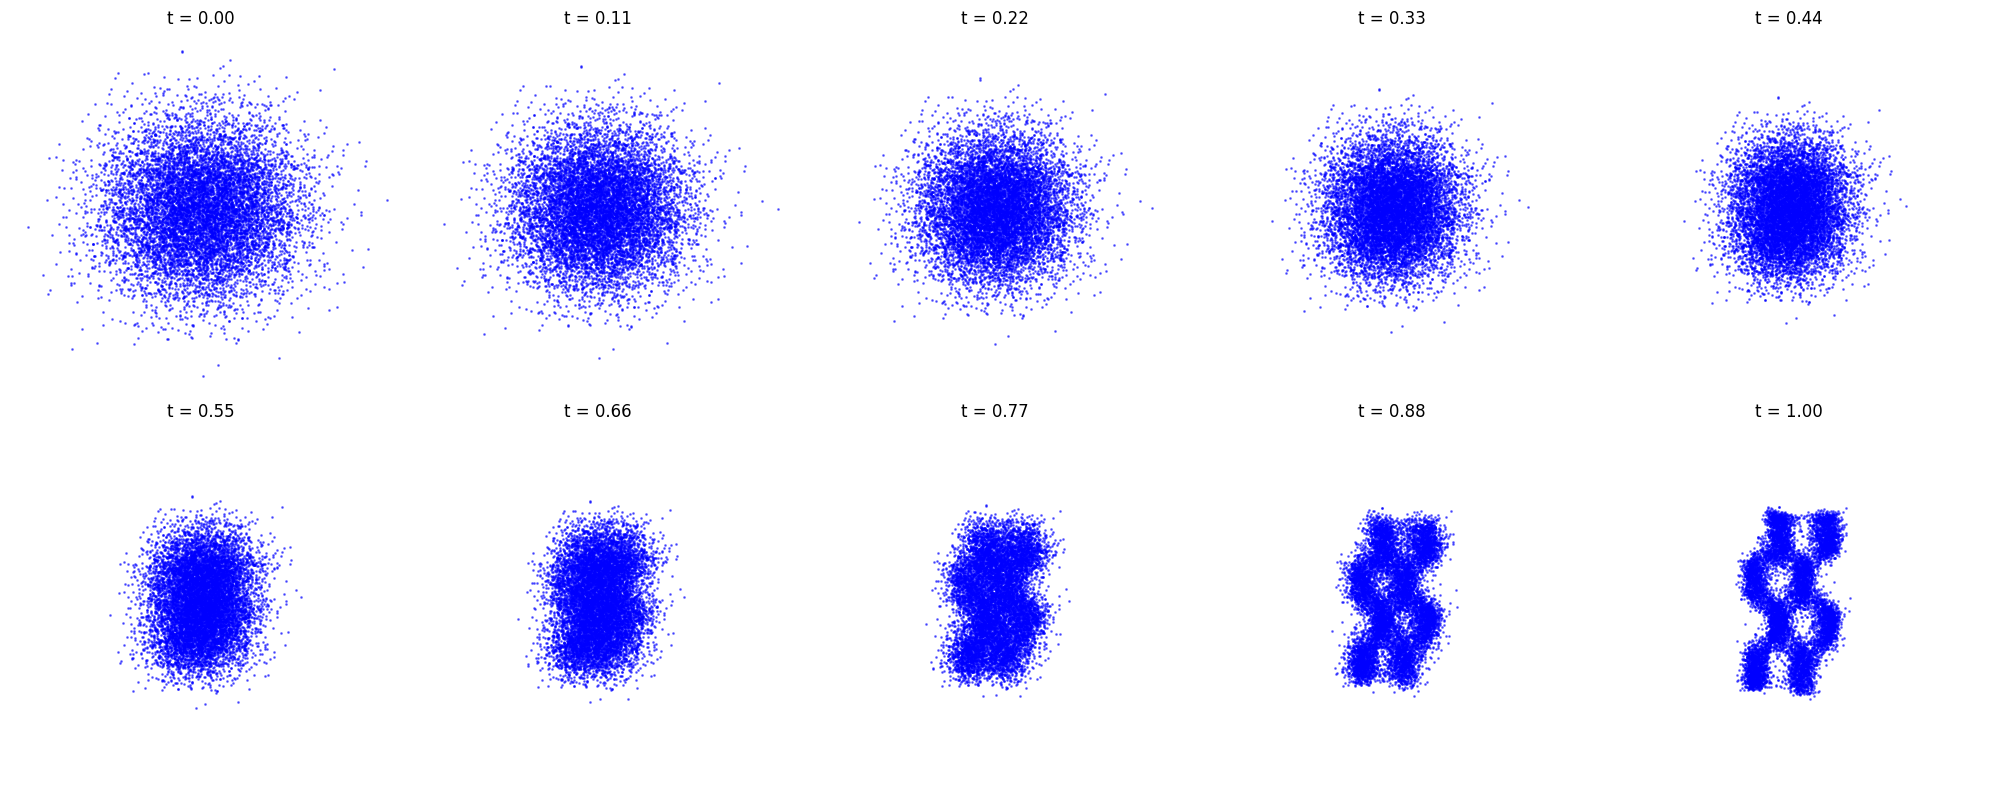

In [17]:
N_SAMPLES = 10000
N_STEPS = 100
final_x, traj = sample(model, n_samples=N_SAMPLES, dim=2, device=device, steps=N_STEPS, y=None)

# Select 10 frames
num_frames = 10
indices = np.linspace(0, len(traj) - 1, num_frames, dtype=int)
selected_frames = [traj[i] for i in indices]

print("Plotting reconstruction steps...")

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()
for i, ax in enumerate(axes):
    frame_idx = indices[i]
    t_val = frame_idx / N_STEPS
    data = selected_frames[i].numpy()
    ax.scatter(data[:, 0], data[:, 1], s=1, alpha=0.5, color="blue")
    ax.set_title(f"t = {t_val:.2f}")
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.axis("off")
plt.tight_layout()
plt.show()